In [1]:
mountedDB = {}

## 欢迎进入 Notebook  

这里你可以编写代码，文档  

### 关于文件目录  


**project**：project 目录是本项目的工作空间，可以把将项目运行有关的所有文件放在这里，目录中文件的增、删、改操作都会被保留  


**input**：input 目录是数据集的挂载位置，所有挂载进项目的数据集都在这里，未挂载数据集时 input 目录被隐藏  


**temp**：temp 目录是临时磁盘空间，训练或分析过程中产生的不必要文件可以存放在这里，目录中的文件不会保存  


In [2]:
# 查看个人持久化工作区文件
!ls /home/mw/project/

correlation_heatmap.png  ruc_Class25Q1_test_processed.csv
new_file1.csv		 ruc_Class25Q1_train_split_test.csv
new_file2.csv		 ruc_Class25Q1_train_split_train.csv
new_file3.csv		 ruc_Class25Q1_train_X_test.csv
new_file4.csv		 ruc_Class25Q1_train_X_train.csv
new_file5.csv		 ruc_Class25Q1_train_y_test.csv
new_file.csv		 ruc_Class25Q1_train_y_train.csv


In [3]:
# 查看当前挂载的数据集目录
!ls /home/mw/input/

__init__.py  test2681  train6289


In [4]:
!pip install missingno

In [5]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 856.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.3 MB/s eta 0:00:00


In [6]:
# Packages for Data Processing
import numpy as np
import pandas as pd
import missingno as msno
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for Modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RepeatedKFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, get_scorer 
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

# Packages for Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# sns.set_style('ticks')

# Packages for Plotting Map
import folium
from folium.plugins import MarkerCluster

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('/home/mw/input/train6289/ruc_Class25Q1_train.csv')
df.head(5)

,城市,区域,板块,环线,小区名称,价格,房屋户型,所在楼层,建筑面积,套内面积,...,产权所属,抵押信息,房屋优势,核心卖点,户型介绍,周边配套,交通出行,lon,lat,年份
0,0,79.0,111.0,二至三环,人定湖西里,6564200,2室1厅1厨1卫,中楼层 (共5层),52.3㎡,NaN,...,非共有,NaN,装修、房本满五年,此房是南北通透小板楼，户型方正，格局合理,房子是南北通透户型方正采光好，前后没有遮挡视野好，通风效果好,医院、公园、超市，生活便利，火箭军医院、积水潭医院，双秀公园，人定湖公园，物美超市、世纪华联等。,NaN,116.389326,39.963727,2018.0
1,0,43.0,231.0,五至六环,龙跃苑四区,4174000,3室1厅1厨1卫,顶层 (共6层),127.44㎡,123.7㎡,...,非共有,NaN,装修、房本满五年,南北通透商品房自住装修无个税,房子三居一卫，户型方正，南北通透，客厅朝南带阳台，主卧朝南，东向有窗户，次卧、厨房朝北，厨房...,医院：北京京都儿童医院、昌平中西结合医院，积水潭医院配套设施：美廉美，工商，农行，邮政等银行...,NaN,116.354287,40.079237,2017.0
2,0,97.0,54.0,五至六环,名都园,16310000,4室2厅1厨4卫,底层 (共3层),228.54㎡,NaN,...,非共有,NaN,房本满五年,有挑空客厅私家车库花园和*,地上三层地下一层四期密度低没有公寓一层车库可以做卧室花园有100平米左右,NaN,NaN,116.543168,40.078165,2018.0
3,0,62.0,568.0,三至四环,保利海德公园,2834600,2房间2卫,低楼层 (共10层),43.6㎡,29.39㎡,...,非共有,NaN,地铁、房本满五年、,NaN,NaN,NaN,NaN,116.357585,39.980030,2016.0
4,0,62.0,226.0,三至四环,京投银泰琨御府,1954000,1房间1卫,中楼层 (共10层),39.85㎡,29.94㎡,...,非共有,NaN,地铁、房本满五年,此房朝向是南向户型，小区位于地铁6号线和10号线的*,NaN,NaN,小区为一站式地铁，楼栋位于*，地铁线路为6号线和10号线慈寿寺站，位于上盖下边。,116.299697,39.940604,2017.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84133 entries, 0 to 84132
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   城市      84133 non-null  int64  
 1   区域      84133 non-null  float64
 2   板块      84133 non-null  float64
 3   环线      42726 non-null  object 
 4   小区名称    84133 non-null  object 
 5   价格      84133 non-null  int64  
 6   房屋户型    83528 non-null  object 
 7   所在楼层    84133 non-null  object 
 8   建筑面积    84133 non-null  object 
 9   套内面积    25146 non-null  object 
 10  房屋朝向    84133 non-null  object 
 11  建筑结构    83528 non-null  object 
 12  装修情况    83528 non-null  object 
 13  梯户比例    82438 non-null  object 
 14  配备电梯    75818 non-null  object 
 15  别墅类型    749 non-null    object 
 16  交易时间    84133 non-null  object 
 17  交易权属    84133 non-null  object 
 18  上次交易    55180 non-null  object 
 19  房屋用途    84131 non-null  object 
 20  房屋年限    54351 non-null  object 
 21  产权所属    84133 non-null  object 
 22

In [9]:
df.drop(columns=['小区名称', '所在楼层', '套内面积', '建筑结构', '别墅类型', '交易时间','交易权属', '房屋用途', '抵押信息', '房屋优势', '核心卖点', '户型介绍', '周边配套', '交通出行', 'lon', 'lat','环线', '梯户比例'], inplace=True)

In [10]:
df.isnull().sum()

城市          0
区域          0
板块          0
价格          0
房屋户型      605
建筑面积        0
房屋朝向        0
装修情况      605
配备电梯     8315
上次交易    28953
房屋年限    29782
产权所属        0
年份          0
dtype: int64

<AxesSubplot: >

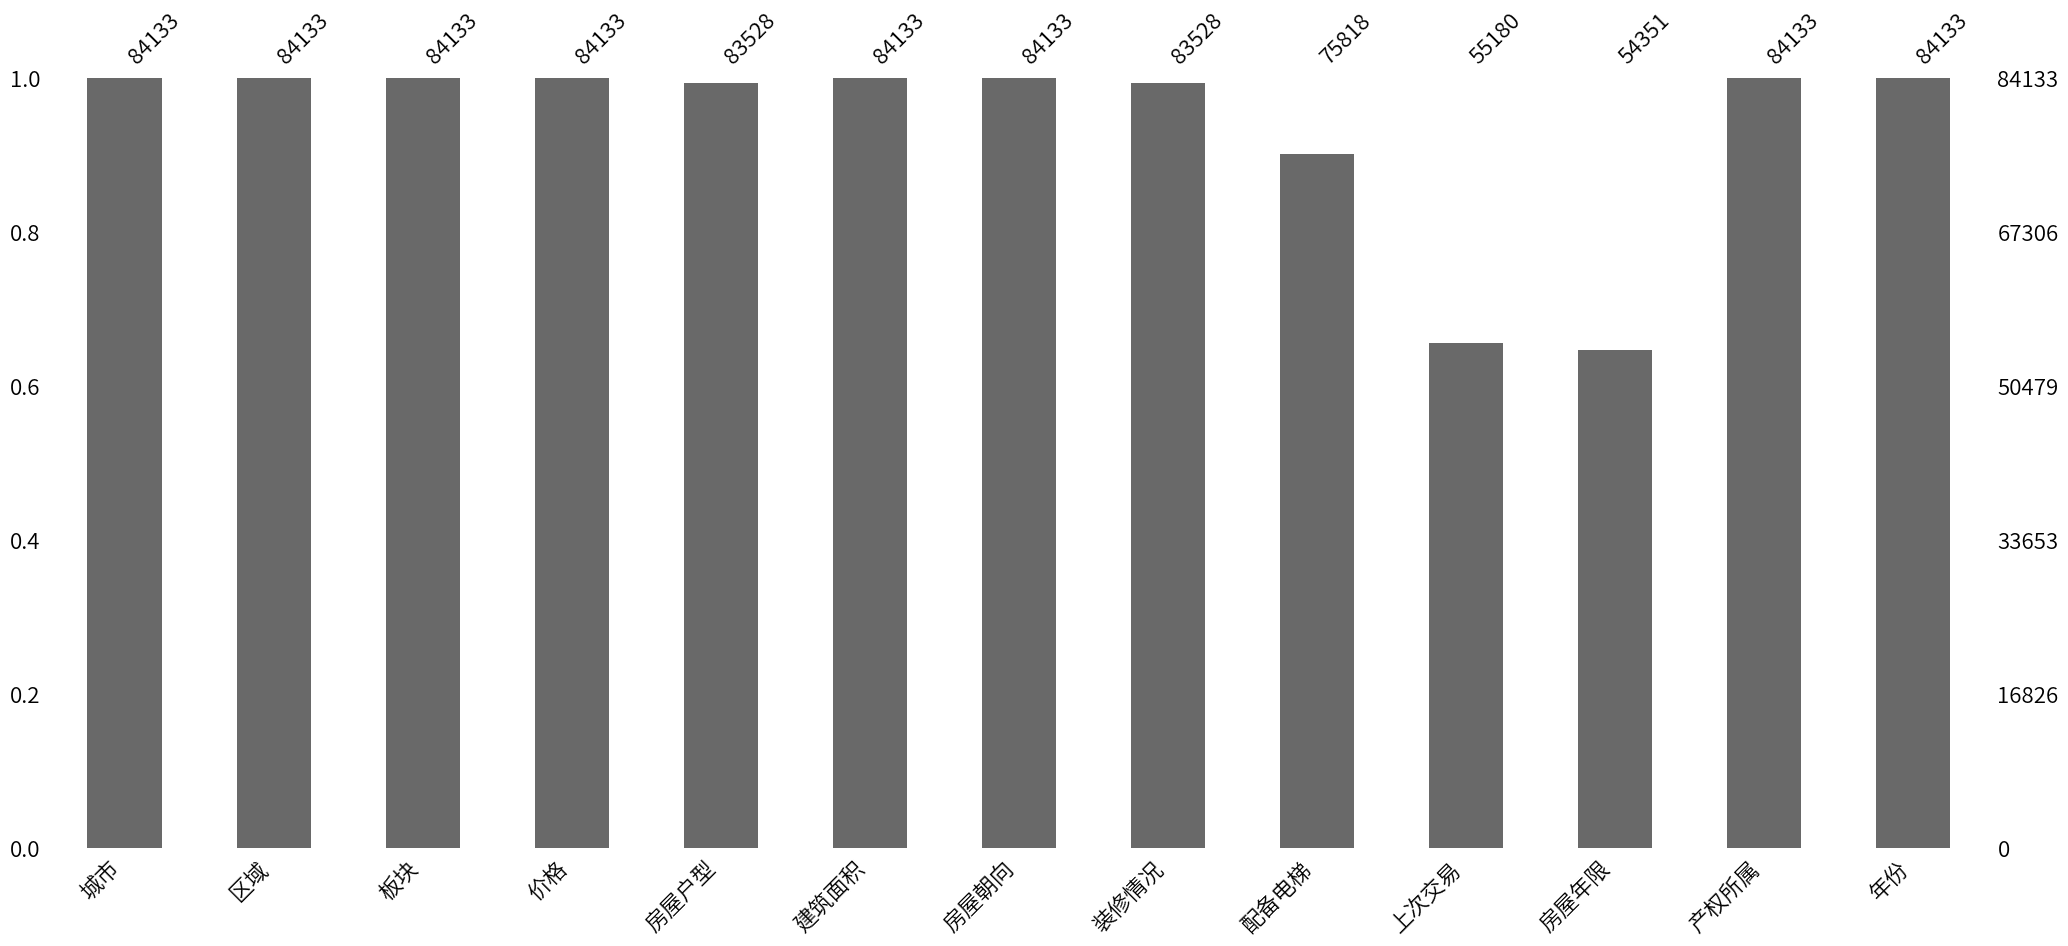

In [11]:
msno.bar(df)

In [12]:
df_miss = df.dropna(axis=0, how='any')
print(f"{df.shape[0] - df_miss.shape[0]} rows removed")

33887 rows removed


In [13]:
df = df_miss
df.isnull().sum()

城市      0
区域      0
板块      0
价格      0
房屋户型    0
建筑面积    0
房屋朝向    0
装修情况    0
配备电梯    0
上次交易    0
房屋年限    0
产权所属    0
年份      0
dtype: int64

In [14]:
# 定义提取第一个数字的函数
def extract_first_number(row):
    match = re.search(r'(\d+)', row)
    if match:
        return int(match.group(1))
    return 0

# 定义提取最后一个数字的函数
def extract_last_number(row):
    matches = re.findall(r'(\d+)', row)
    if matches:
        return int(matches[-1])
    return 0

# 提取第一个数字并创建新列 'room'
df['room'] = df['房屋户型'].apply(extract_first_number)

# 提取最后一个数字并创建新列 'toi'
df['toi'] = df['房屋户型'].apply(extract_last_number)

In [15]:
# 将修改后的数据保存到新的 CSV 文件，需替换为你想保存的文件路径
df.to_csv('new_file1.csv', index=False)

In [16]:
def extract_room_num(row):
    pattern_room = r'(\d+)(?:室|房间)'
    match = re.search(pattern_room, row)
    if match:
        return int(match.group(1))
    return 0


def extract_toilet_num(row):
    pattern_toilet = r'(\d+)卫'
    match = re.search(pattern_toilet, row)
    if match:
        return int(match.group(1))
    return 0

# 提取室数量并创建新列
df['room'] = df['房屋户型'].apply(extract_room_num)

# 提取卫数量并创建新列
df['toi'] = df['房屋户型'].apply(extract_toilet_num)

# 将修改后的数据保存到新的 CSV 文件，需替换为你想保存的文件路径
df.to_csv('new_file1.csv', index=False)

In [17]:
# 检查列是否存在，如果存在则删除
df = pd.read_csv('new_file1.csv')
columns_to_drop = ['室的数量', '卫的数量']
existing_columns = [col for col in columns_to_drop if col in df.columns]
if existing_columns:
    df = df.drop(columns=existing_columns)
# 保存修改后的数据到新的 CSV 文件
df.to_csv('new_file2.csv', index=False)

In [18]:
df = pd.read_csv('new_file2.csv')
print('Unique values of room: \n ', df.room.unique(),'\n',
      'Unique values of toi: \n ', df.toi.unique())

Unique values of room: 
  [ 2  3  4  1  5  6  7  8  9 12  0 10 14 16] 
 Unique values of toi: 
  [ 1  4  2  3  0  5  7  6  9  8 14]


In [19]:
df['toi'] = round(df['toi'])
print('Unique values of room: \n ', df.room.unique(),'\n',
      'Unique values of toi: \n ', df.toi.unique())

Unique values of room: 
  [ 2  3  4  1  5  6  7  8  9 12  0 10 14 16] 
 Unique values of toi: 
  [ 1  4  2  3  0  5  7  6  9  8 14]


In [20]:
# 将“建筑面积”列转换为字符串类型
df['建筑面积'] = df['建筑面积'].astype(str)

# 去除“建筑面积”列中的“㎡”
df['建筑面积'] = df['建筑面积'].str.replace('㎡', '')

# 将“建筑面积”列的数据类型转换为数值型
df['建筑面积'] = pd.to_numeric(df['建筑面积'])

# 保存修改后的数据到新的 CSV 文件
df.to_csv('new_file3.csv', index=False)

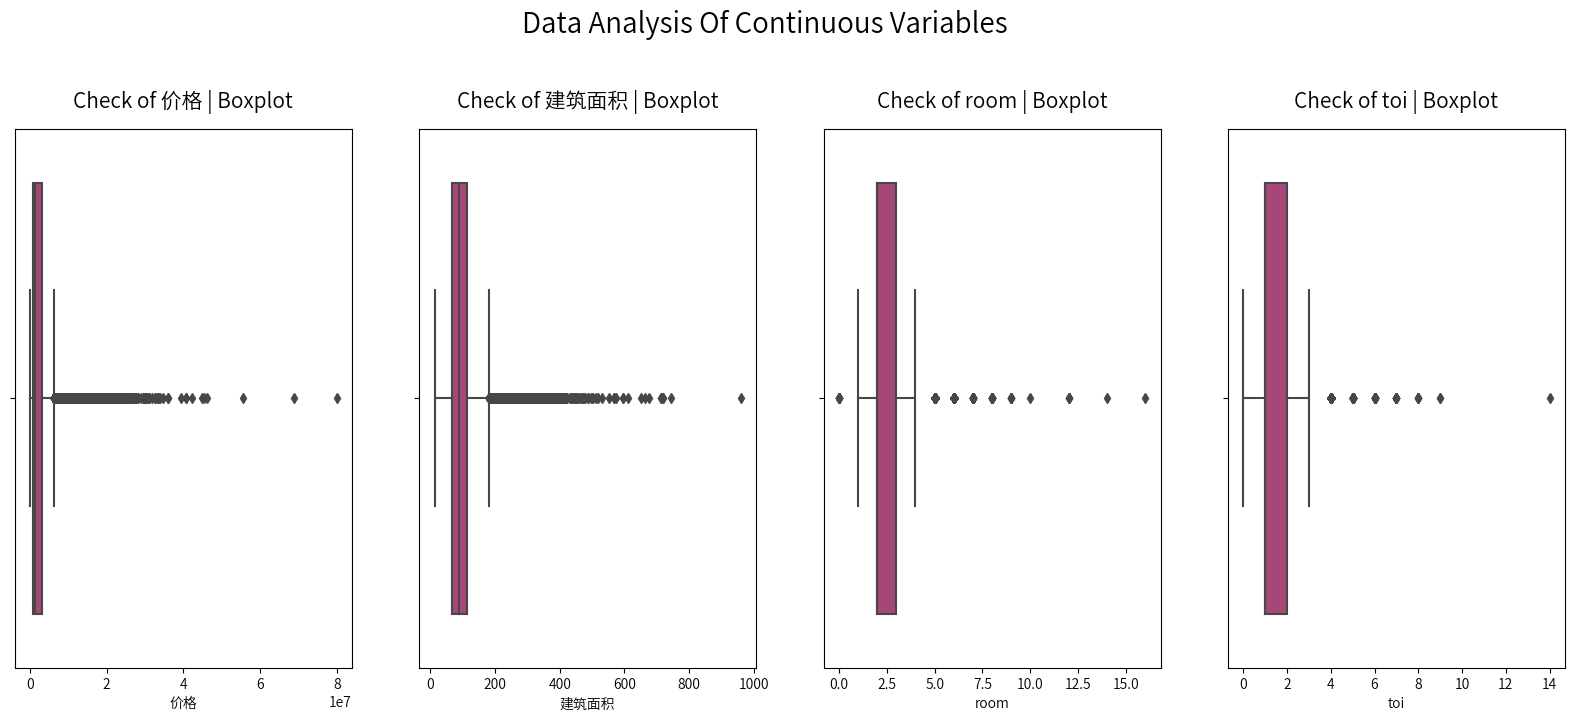

In [21]:
df = pd.read_csv('new_file3.csv')
variables = ['价格', '建筑面积', 'room', 'toi']

# boxplot
plt.figure(figsize = (20, 7))

for i in range(4):
    plt.subplot(1,4,i+1)
    sns.boxplot(x=df[variables[i]], palette='magma')
    plt.title("Check of "+variables[i]+" | Boxplot", fontsize=15, pad=15)
    
plt.suptitle("Data Analysis Of Continuous Variables", fontweight="bold", fontsize=20, y=1.05)

plt.show()

In [22]:
df_out = df[(df['价格']>=1000000) & (df['价格']<=20000000) & 
            (df['建筑面积']>=30) & (df['建筑面积']<=300) & 
            (df['room']<=8) & (df['toi']<=4) ]

print(f"{df.shape[0] - df_out.shape[0]} rows removed")

16747 rows removed


In [23]:
df = df_out

In [24]:
#数据分析
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
城市,33499.0,1.84,2.10,0.00,0.00,1.00,3.00,6.00
区域,33499.0,51.65,26.40,2.00,40.00,52.00,67.00,102.00
板块,33499.0,426.14,227.76,0.00,238.00,427.00,615.00,810.00
价格,33499.0,3210118.36,2651118.07,1000200.00,1436000.00,2287800.00,4020000.00,19942000.00
建筑面积,33499.0,100.73,40.69,30.04,72.57,92.46,123.54,298.99
年份,33499.0,2021.19,0.78,2016.00,2021.00,2021.00,2022.00,2022.00
room,33499.0,2.54,0.90,0.00,2.00,2.00,3.00,8.00
toi,33499.0,1.41,0.58,0.00,1.00,1.00,2.00,4.00


In [25]:
%matplotlib inline

相关系数矩阵：         城市    区域    板块    价格  建筑面积    年份  room   toi
城市    1.00  0.32  0.10 -0.34  0.22 -0.16  0.24  0.17
区域    0.32  1.00  0.10 -0.06  0.03 -0.08 -0.00 -0.03
板块    0.10  0.10  1.00 -0.15 -0.04 -0.02  0.01 -0.01
价格   -0.34 -0.06 -0.15  1.00  0.32  0.14  0.12  0.23
建筑面积  0.22  0.03 -0.04  0.32  1.00 -0.16  0.76  0.76
年份   -0.16 -0.08 -0.02  0.14 -0.16  1.00 -0.15 -0.13
room  0.24 -0.00  0.01  0.12  0.76 -0.15  1.00  0.67
toi   0.17 -0.03 -0.01  0.23  0.76 -0.13  0.67  1.00


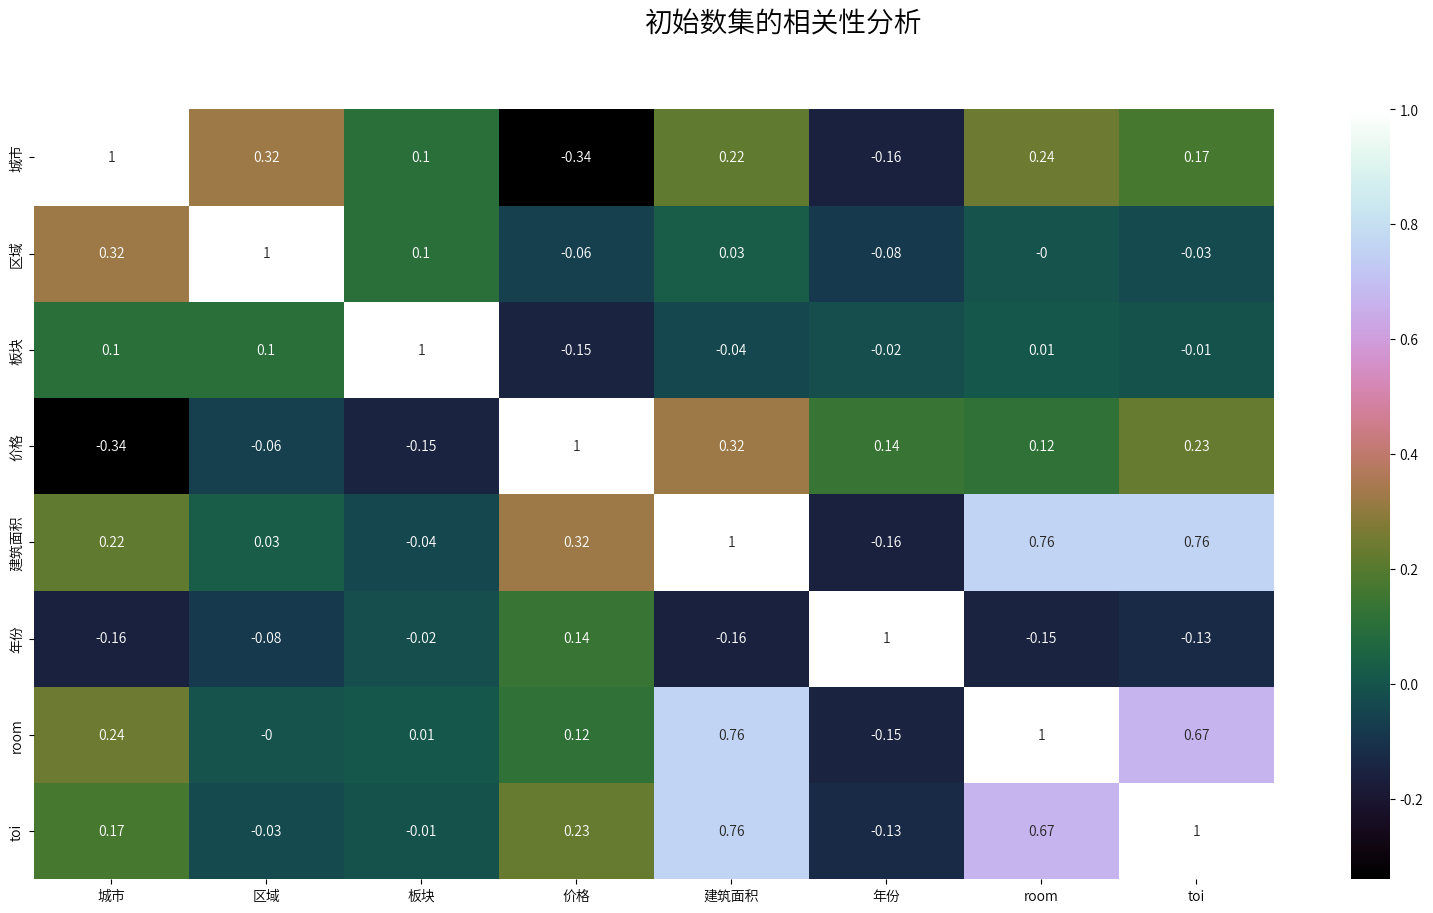

In [26]:
correlation = df.corr().round(2)
print("相关系数矩阵：", correlation)  # 检查相关系数矩阵是否正确计算
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='cubehelix')
plt.suptitle("初始数集的相关性分析", fontweight='bold', fontsize=20)
plt.show()

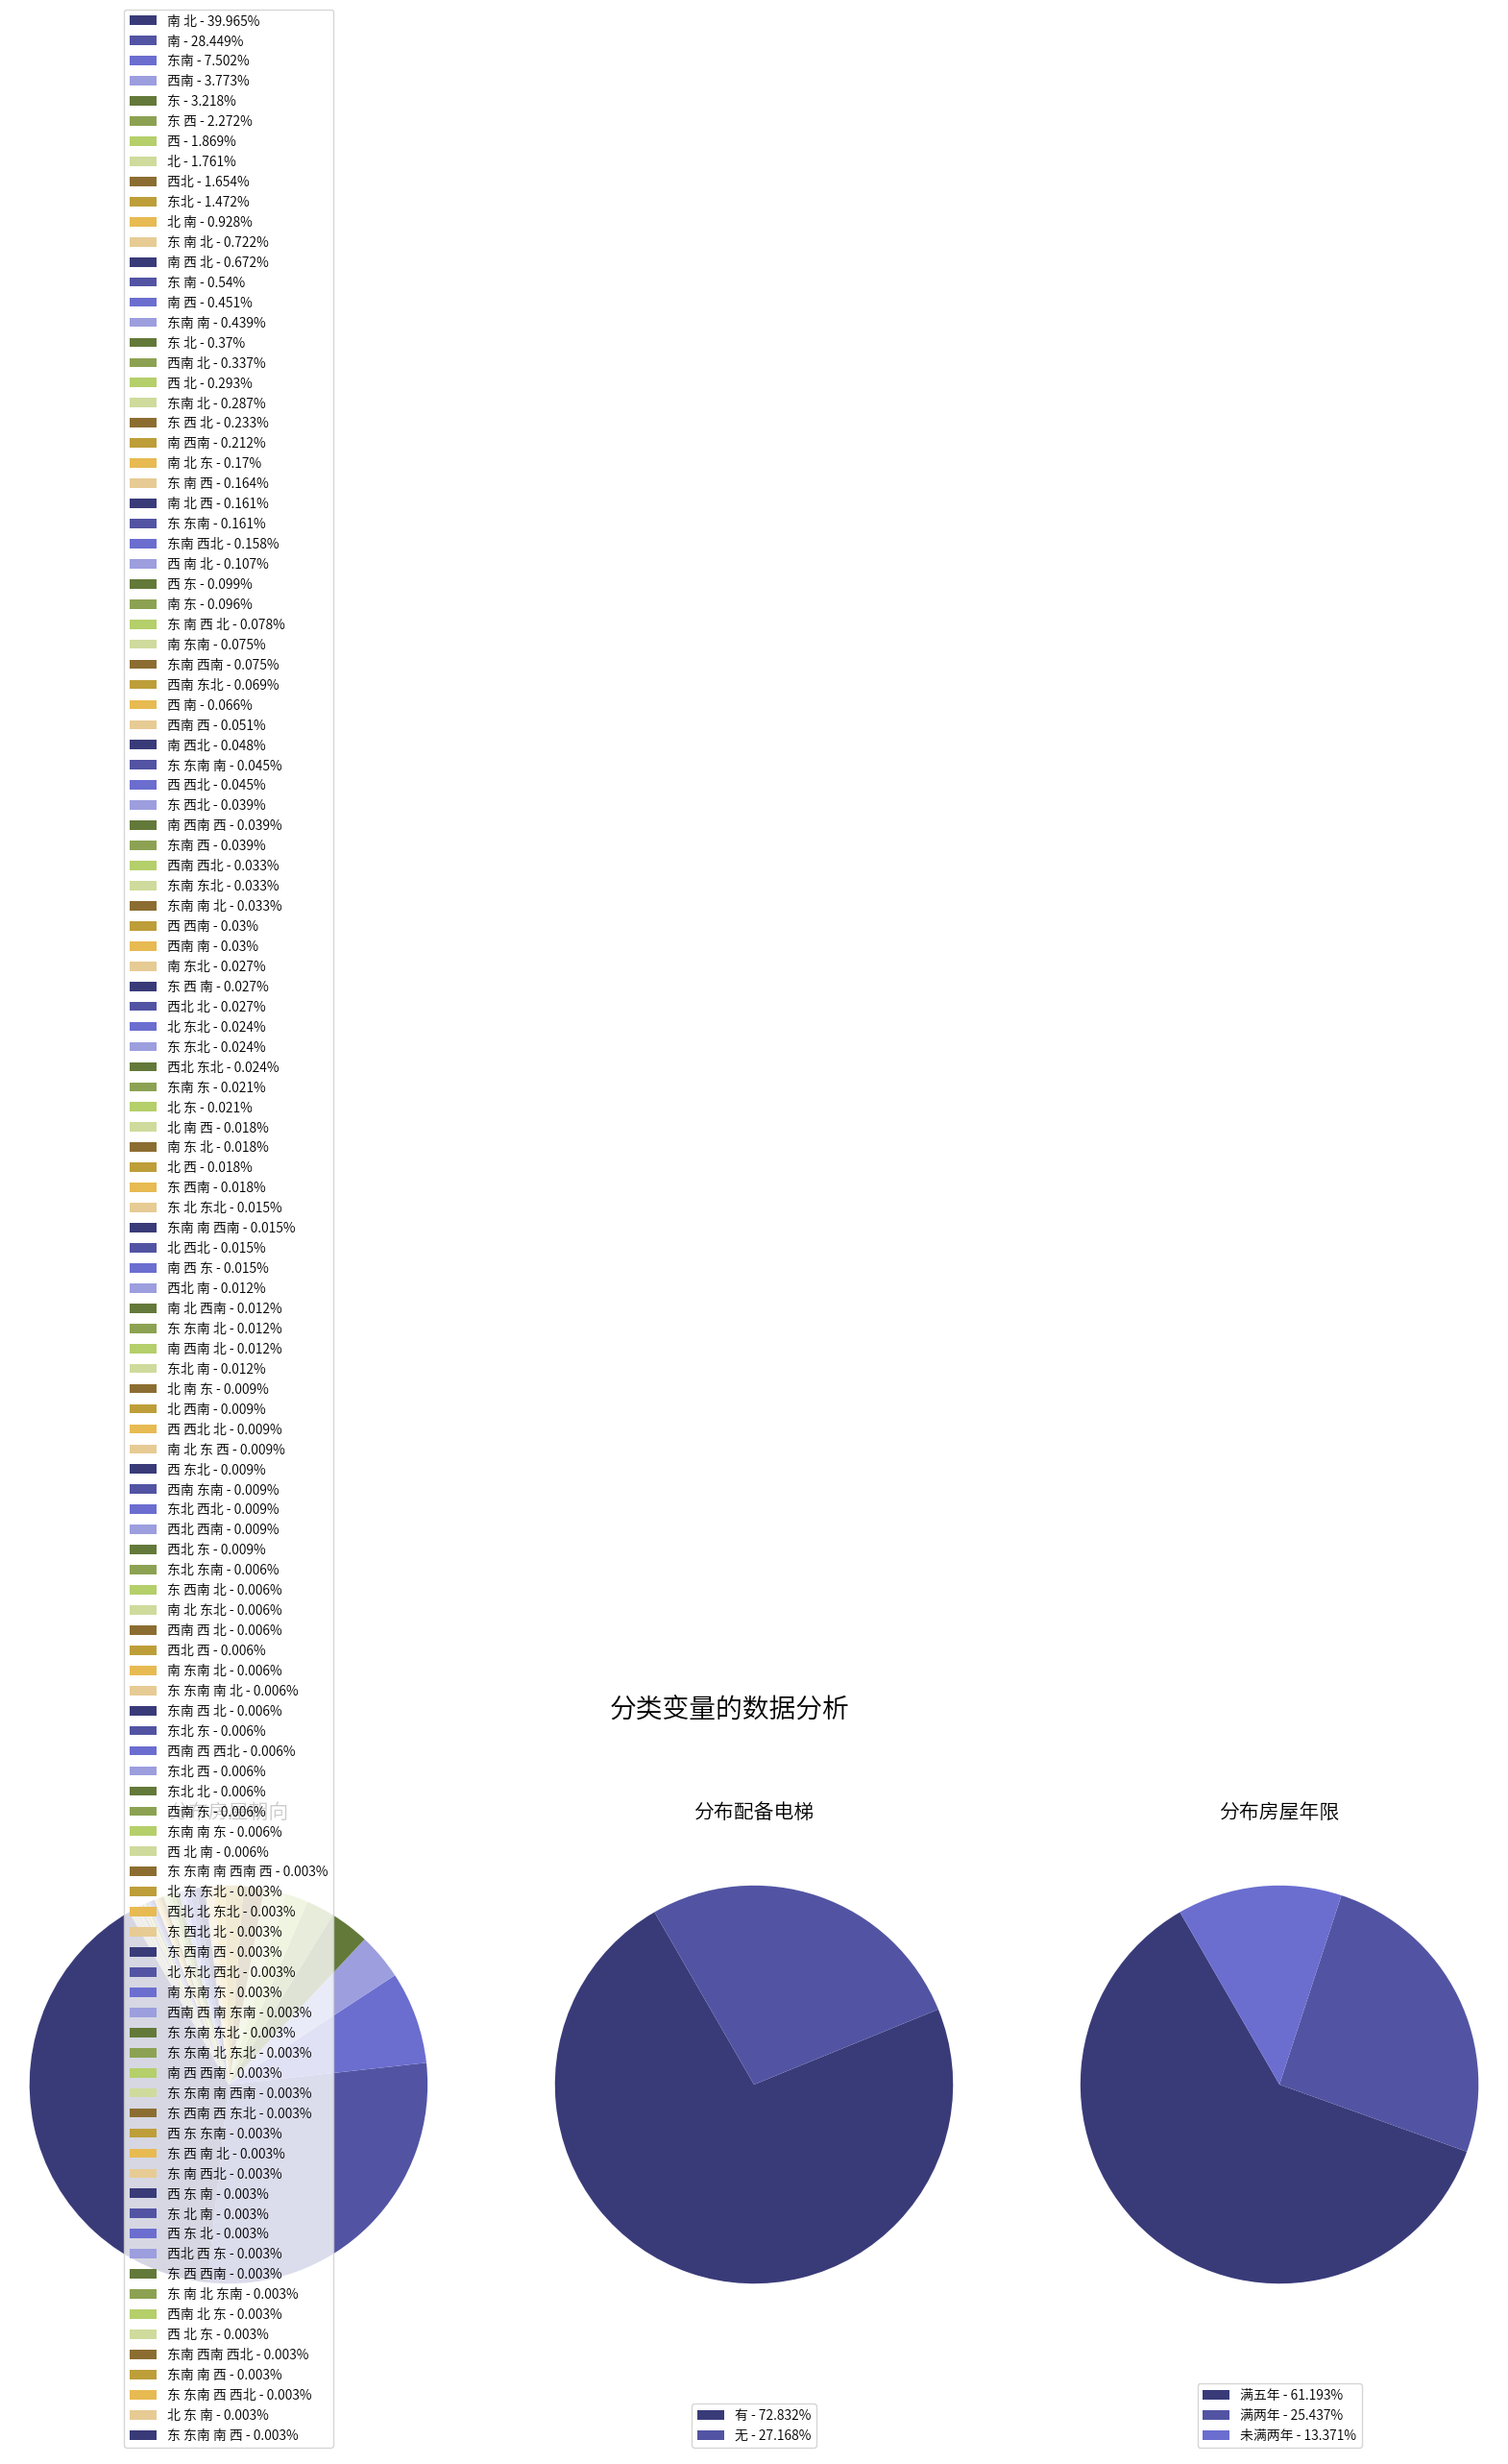

In [27]:
# 分类变量
variables = ['房屋朝向', '配备电梯', '房屋年限']

# 绘图
plt.figure(figsize=(20, 10))

for i in range(3):
    labels = []
    sizes = []
    count = 0
    for k, v in dict(df[variables[i]].value_counts()).items():
        labels.append(f"{k} - {round(((v/df.shape[0])*100), 3)}%")
        sizes.append(v)
        count += 1
        
    plt.subplot(1, 3, i+1)
    patches, texts = plt.pie(sizes, colors=sns.color_palette('tab20b', 12), shadow=False, startangle=120)
    plt.legend(patches, labels, loc='lower center')
    plt.axis('equal')
    plt.title("分布"+variables[i], fontsize=15, y=0.85)
    
plt.suptitle("分类变量的数据分析", fontweight='bold', fontsize=20, y=0.9)
plt.show()

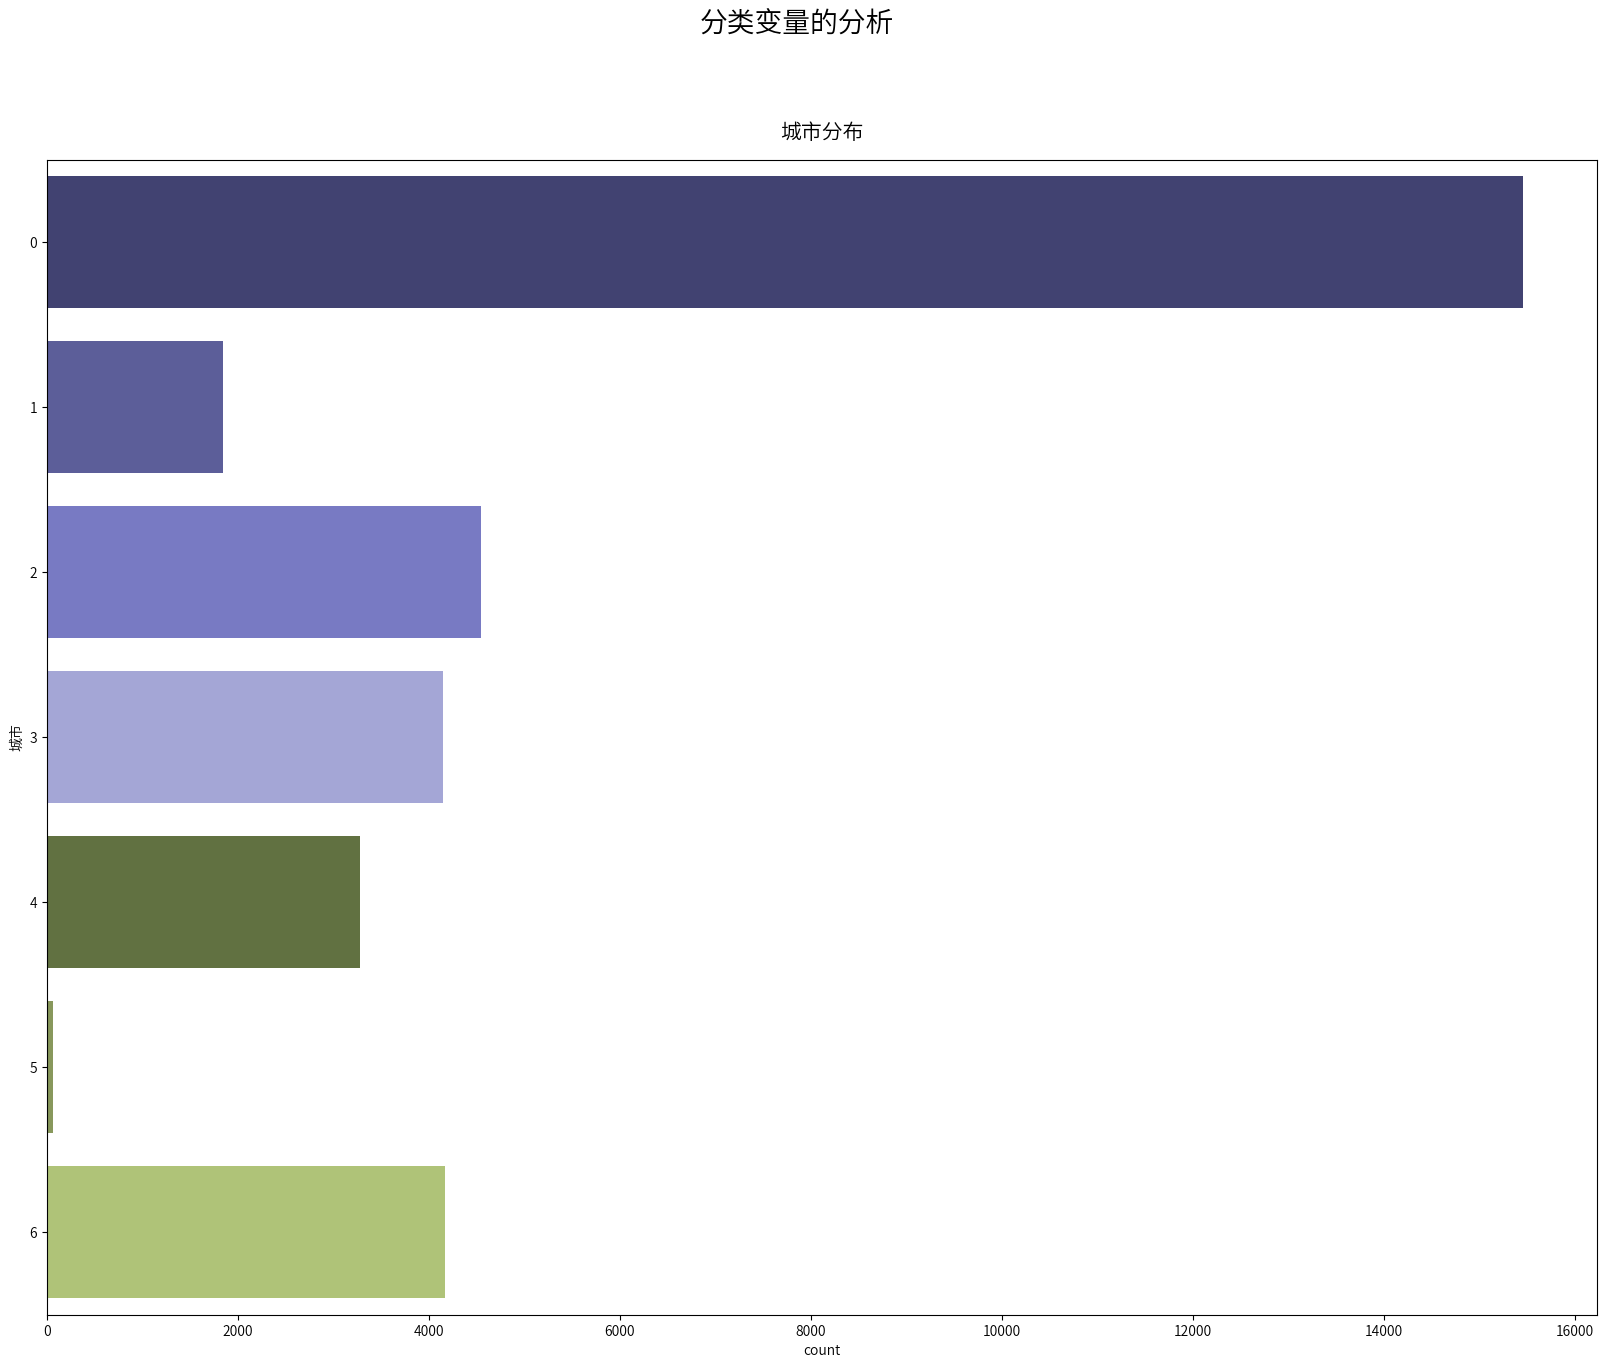

In [28]:
plt.figure(figsize=(20, 15))
sns.countplot(data=df, y='城市', palette='tab20b')
plt.title("城市分布", fontsize=15, pad=15)
plt.suptitle("分类变量的分析", fontweight='bold', fontsize=20)
plt.show()

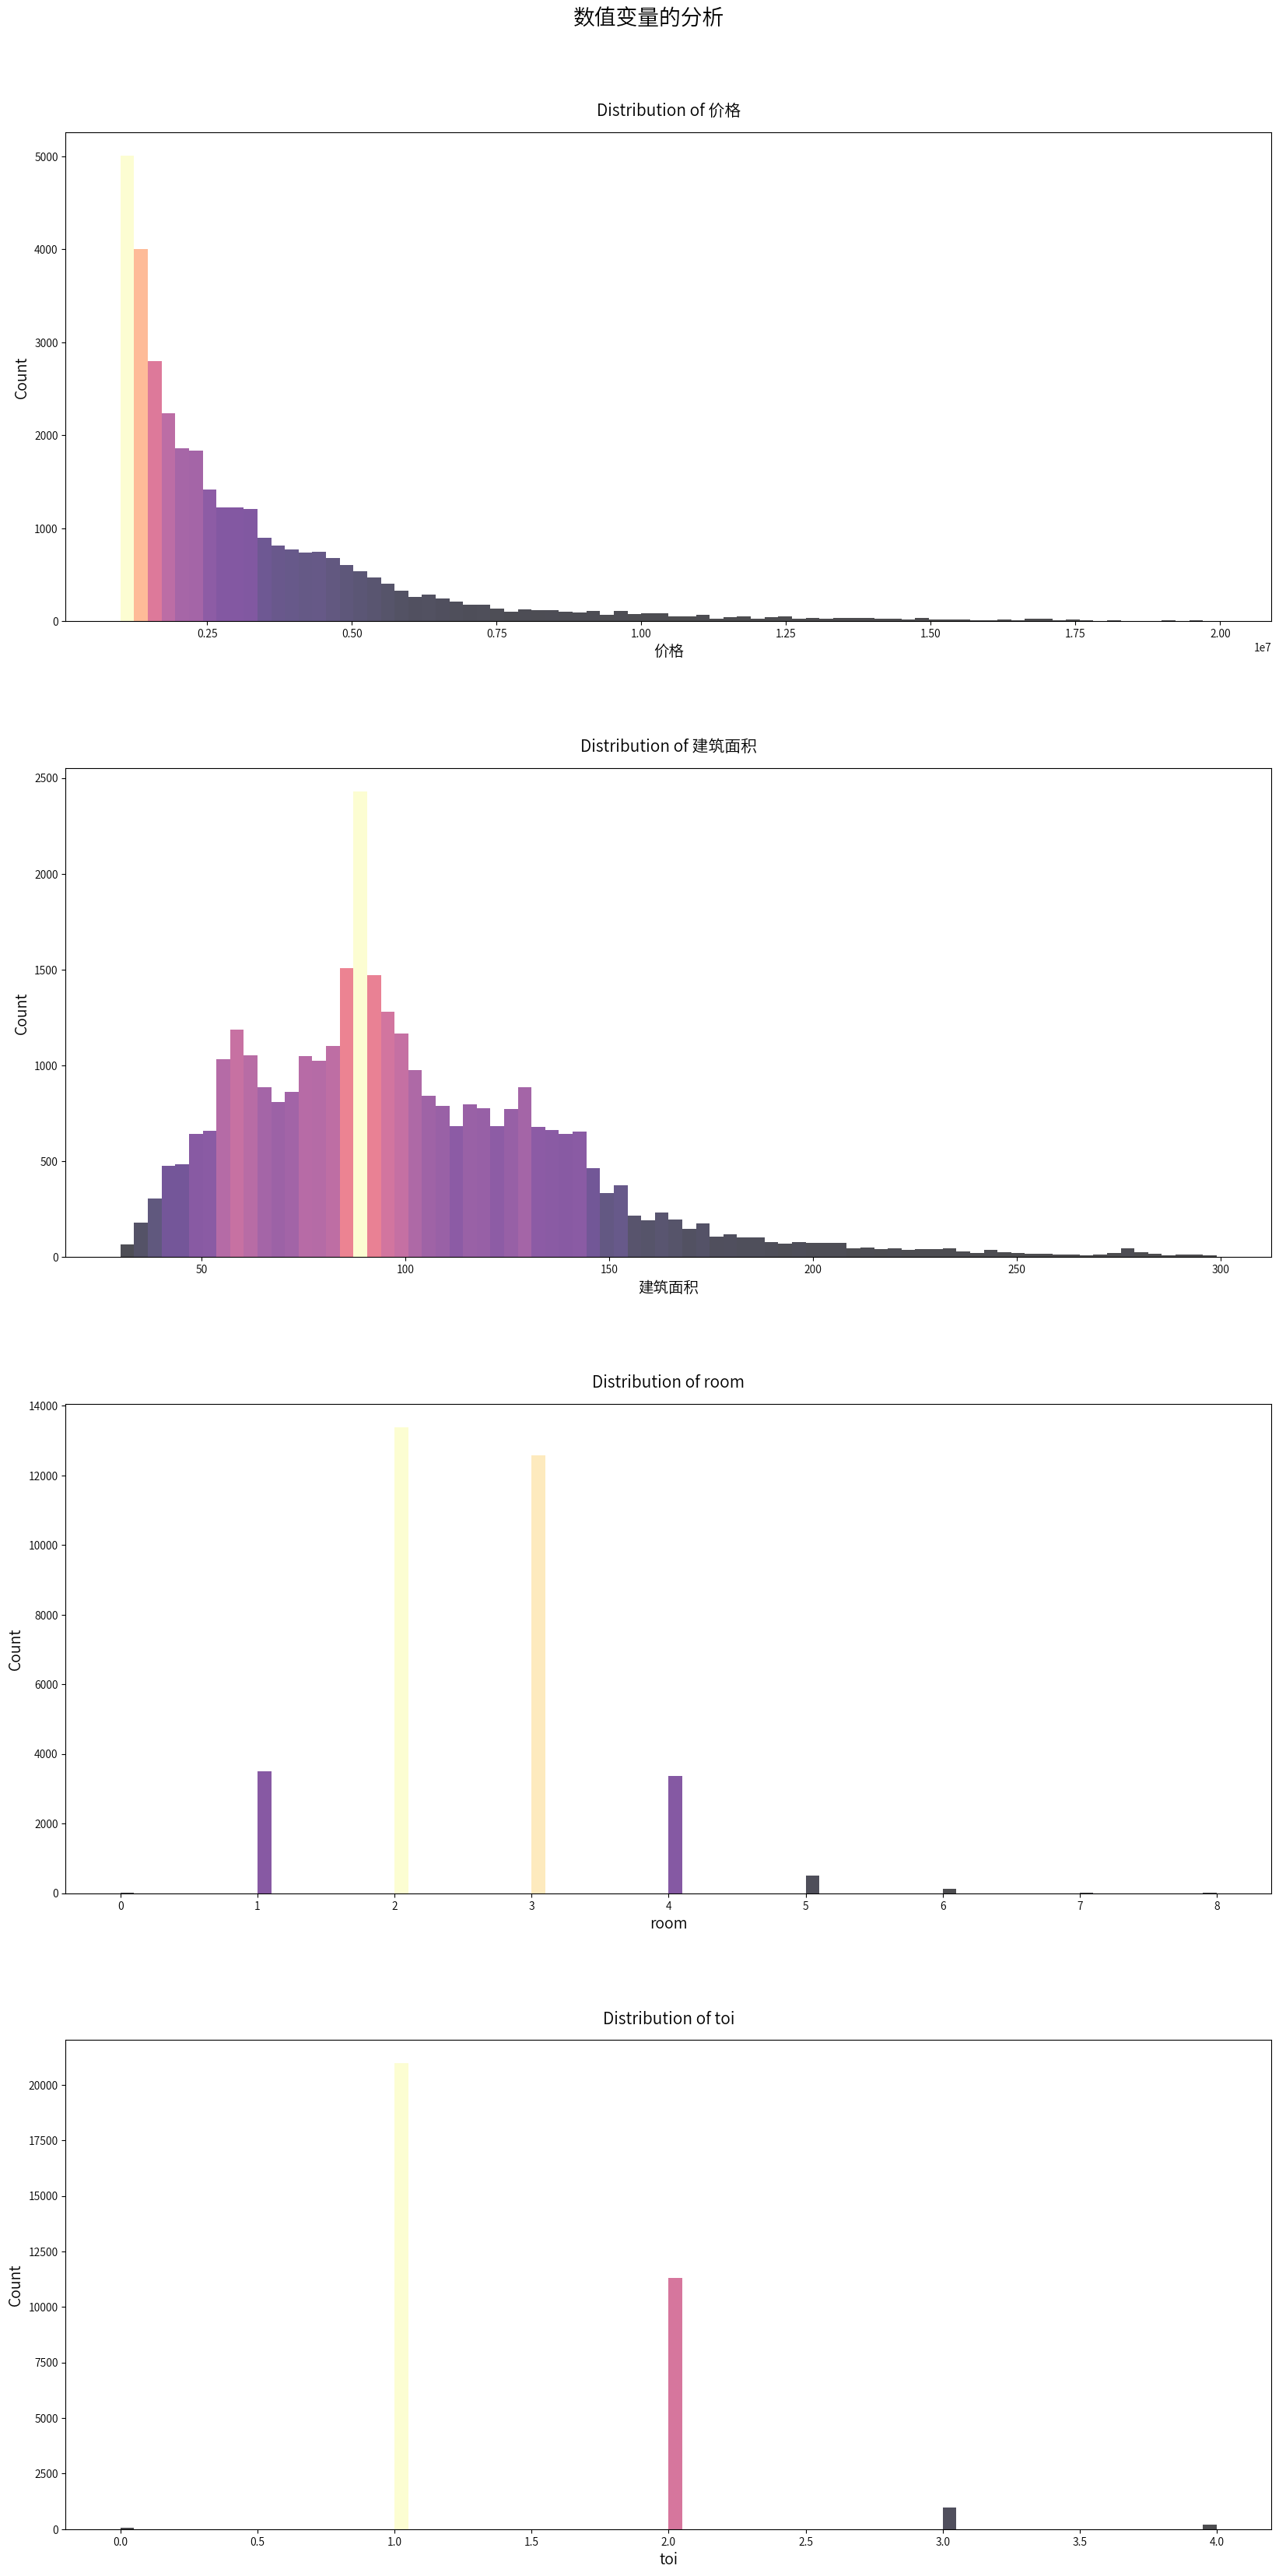

In [29]:
# 数值变量
variables = ['价格', '建筑面积', 'room', 'toi']

# 绘图
fig, axes = plt.subplots(4, 1, figsize=(20, 40))

for i in range(4):
    plt.subplot(4, 1, i+1)
    n, bins, patches = plt.hist(df[variables[i]], bins=80, alpha=0.7)
    for j in range(len(patches)):
        patches[j].set_facecolor(plt.cm.magma(n[j]/max(n)))
    plt.title("Distribution of "+variables[i], fontsize=15, pad=15)
    plt.xlabel(variables[i], fontsize=14)
    plt.ylabel('Count', fontsize=14)

plt.suptitle("数值变量的分析", fontweight='bold', fontsize=20, y=0.92)

# 调整支撑子图
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.show()

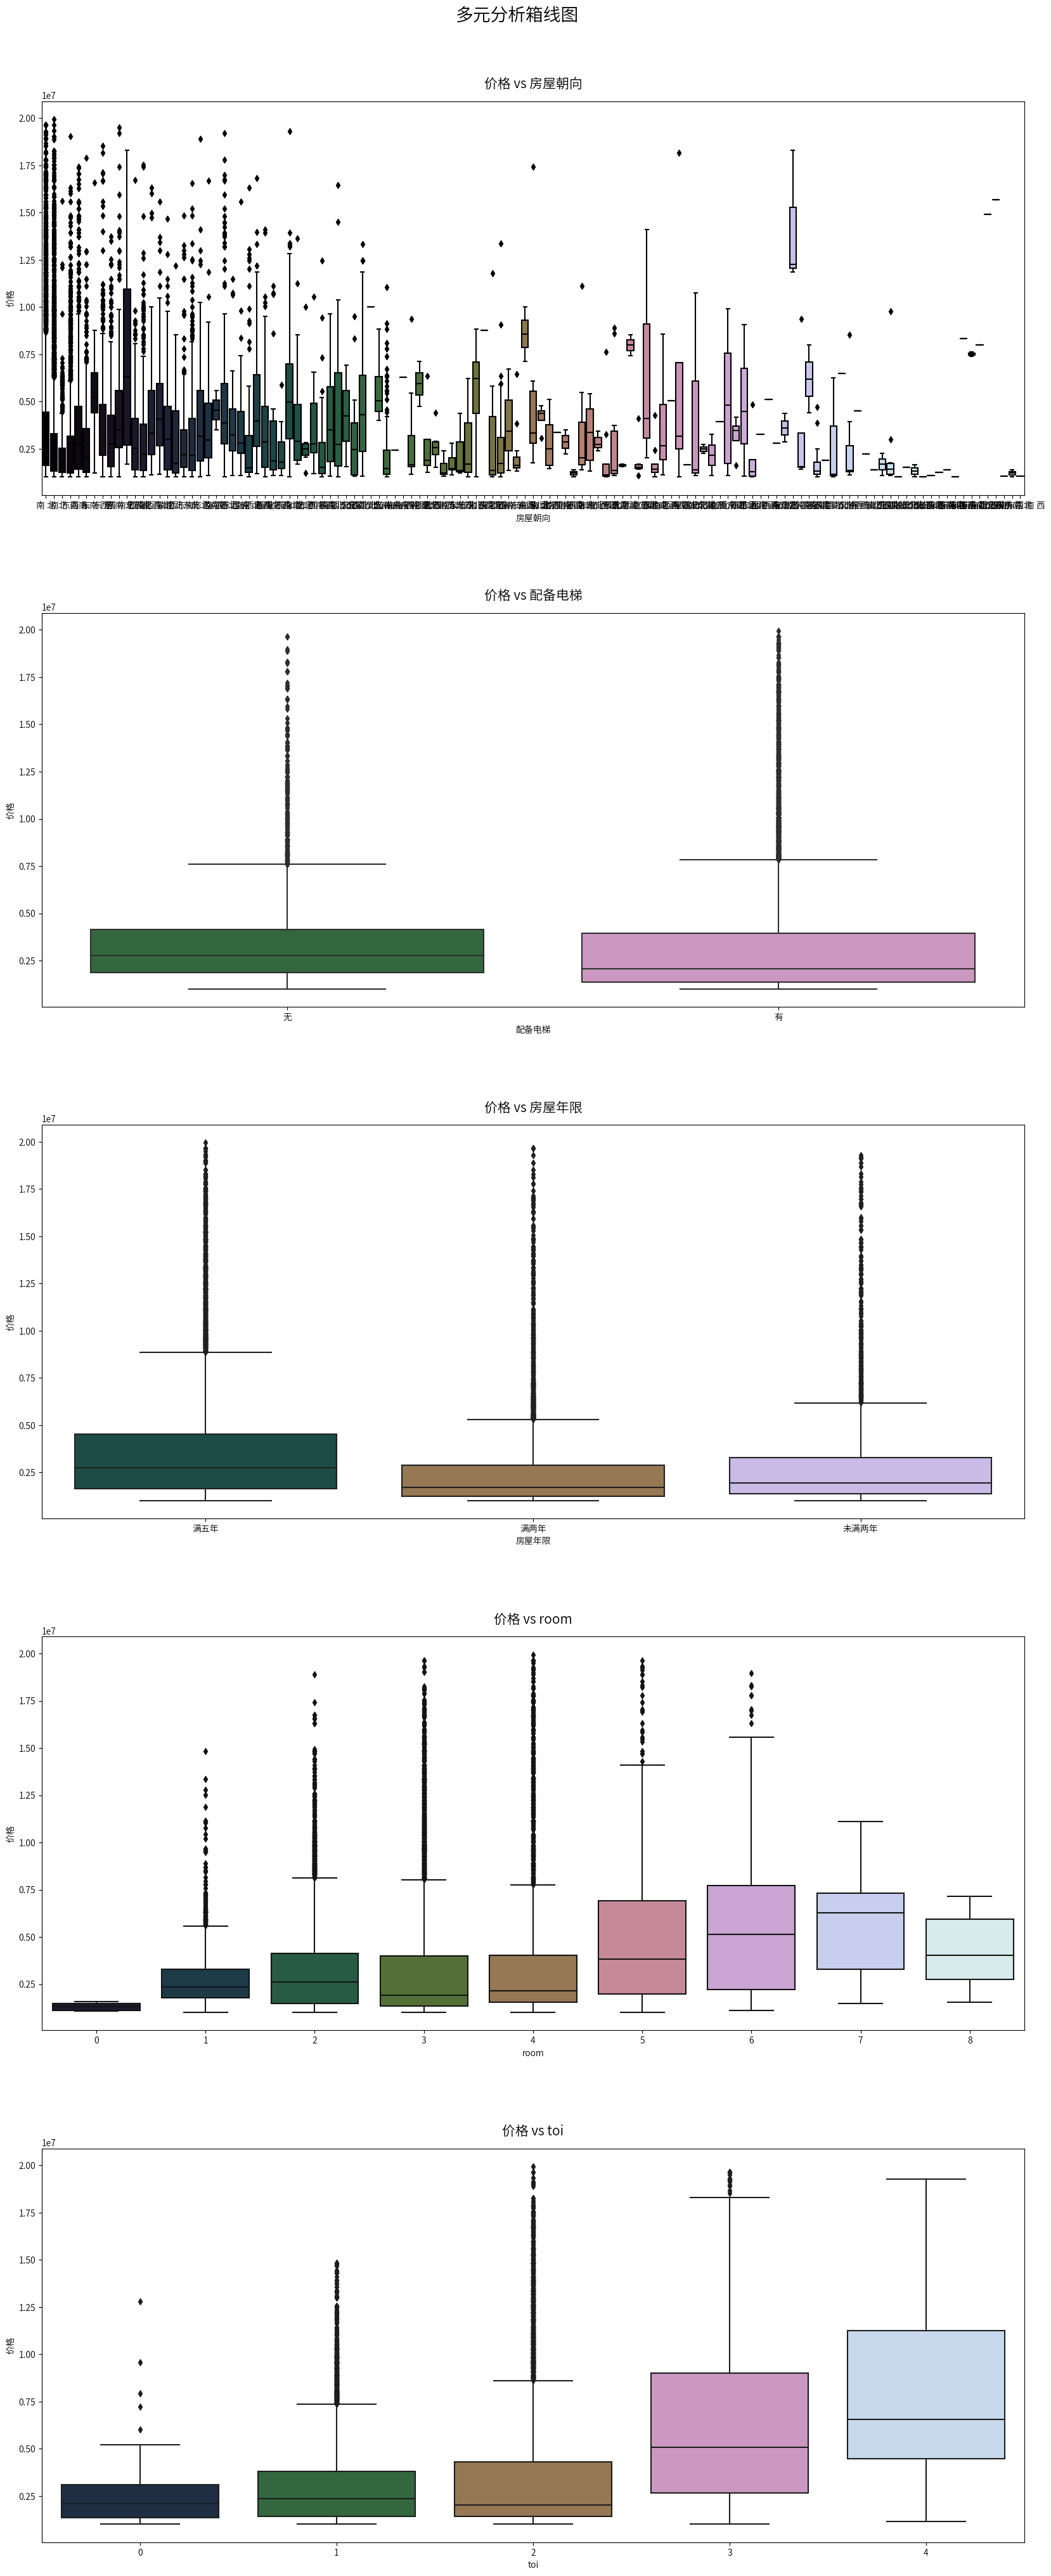

In [30]:
# 多元分析
variables = ['房屋朝向', '配备电梯', '房屋年限', 'room', 'toi']

# 价格和其他变量的二维分析
plt.figure(figsize = (20, 50))

for i in range(5):
    plt.subplot(5,1,i+1)
    sns.boxplot(data=df, x=variables[i], y='价格', palette='cubehelix')
    plt.title("价格 vs "+variables[i], fontsize=15, pad=15)

plt.suptitle("多元分析箱线图", fontweight='bold', fontsize=20, y=0.91)

# 支撑子图的调整
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.show()

In [31]:
# 数据处理
# 先对分类变量进行编码
le = LabelEncoder()
variables = ['城市', '区域', '板块','房屋朝向', '配备电梯', '房屋年限',]

# 遍历每个变量
for i in variables:
    df[i] = le.fit_transform(df[i])

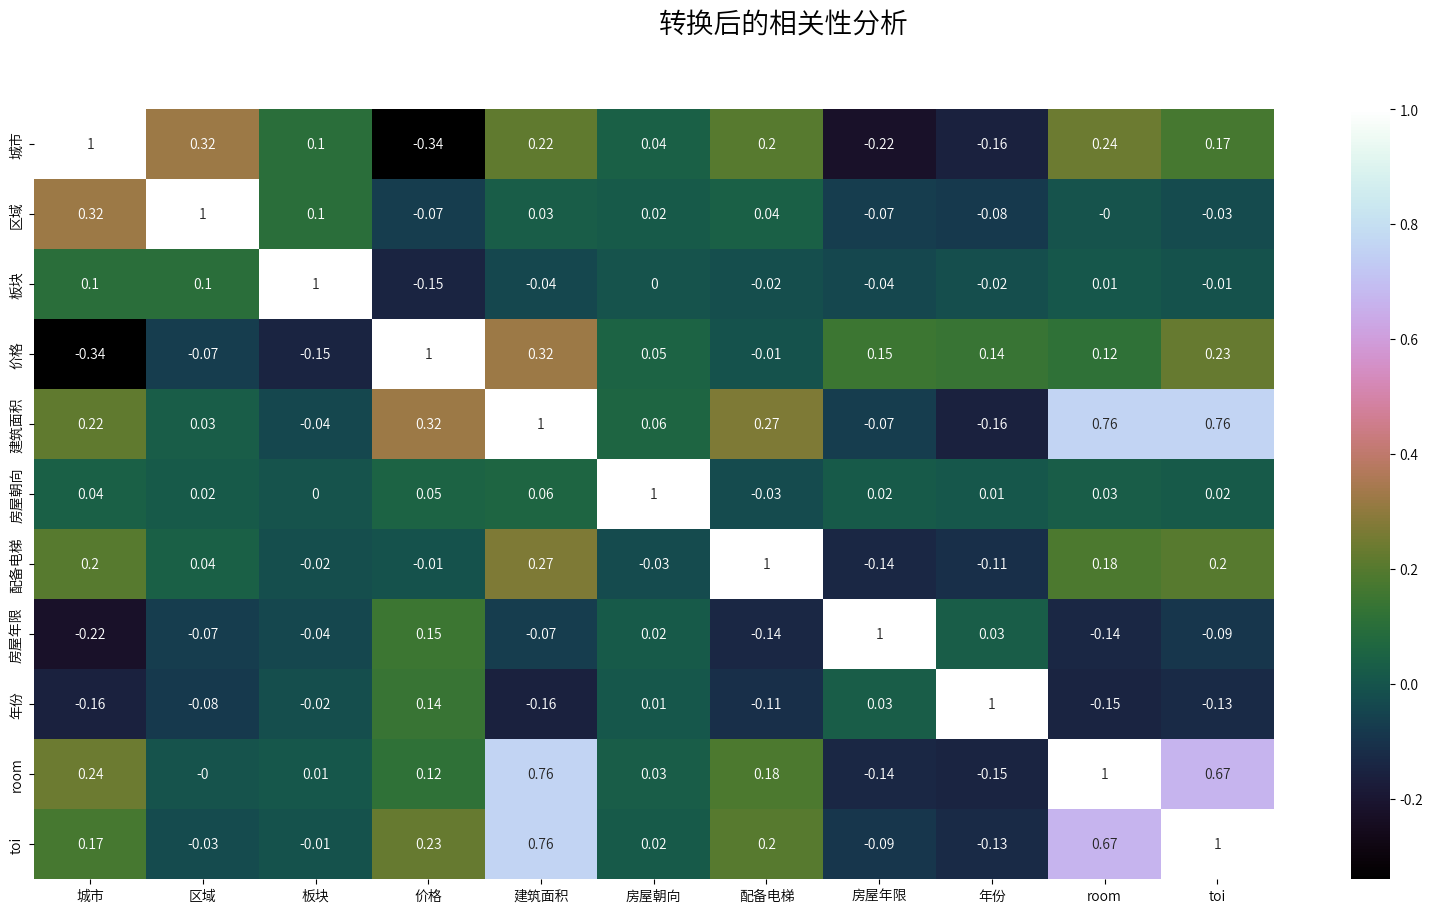

In [32]:
# 相关性分析 绘制热力图
correlation = df.corr().round(2)
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='cubehelix')
plt.suptitle("转换后的相关性分析", fontweight="bold", fontsize=20)
plt.show()

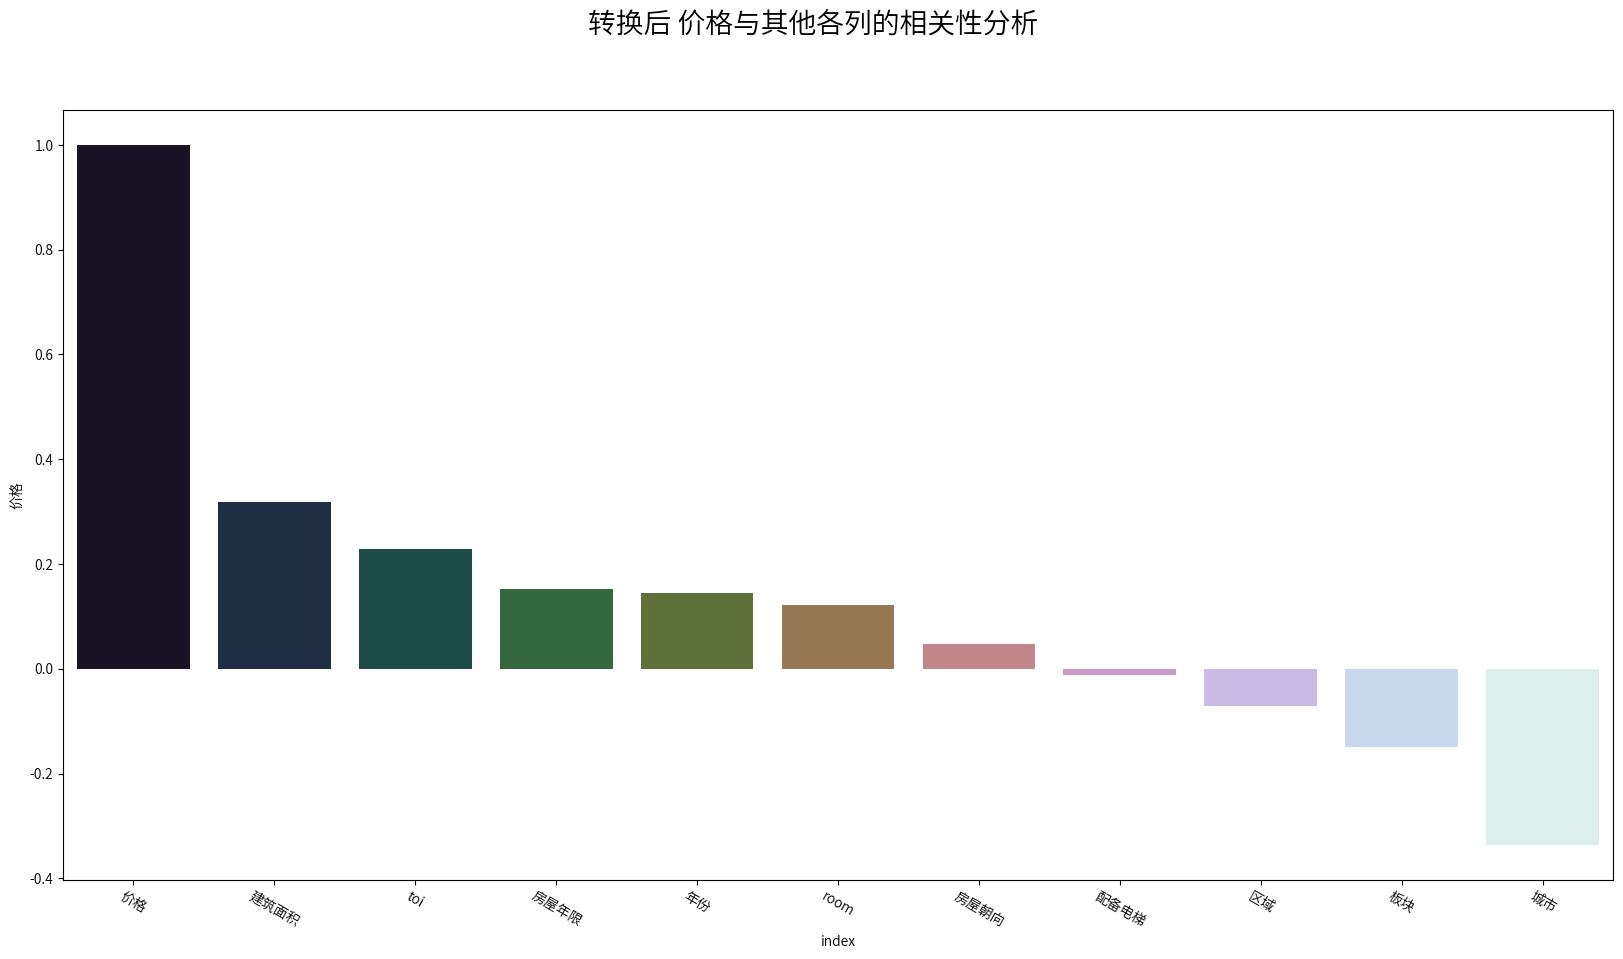

In [33]:
# 各列与价格的关系
plt.figure(figsize = (20, 10))
correlation = df.corr()['价格'].reset_index().sort_values('价格', ascending=False)
sns.barplot(correlation, x='index', y='价格', palette='cubehelix')
plt.xticks(rotation = -30)
plt.suptitle("转换后 价格与其他各列的相关性分析", fontweight="bold", fontsize=20)
plt.show()

In [34]:
# 数据标准化
scaler = StandardScaler()
def scale(x):
    return scaler.fit_transform(x.values.reshape(-1,1))

# List the variables to process
variables = ['建筑面积', 'room', 'toi', '年份']

# Apply Scaler Model
for i in variables:
    df[i] = scale(df[i])

In [35]:
df.drop(columns=['房屋户型'], inplace=True)

# 将修改后的数据保存到新的 CSV 文件，需替换为你想保存的文件路径
df.to_csv('new_file4.csv', index=False)

In [36]:
df.drop(columns=['装修情况'], inplace=True)

# 将修改后的数据保存到新的 CSV 文件，需替换为你想保存的文件路径
df.to_csv('new_file5.csv', index=False)

In [37]:
df.drop(columns=['上次交易'], inplace=True)

# 将修改后的数据保存到新的 CSV 文件，需替换为你想保存的文件路径
df.to_csv('new_file5.csv', index=False)

In [38]:
df.drop(columns=['产权所属'], inplace=True)

# 将修改后的数据保存到新的 CSV 文件，需替换为你想保存的文件路径
df.to_csv('new_file5.csv', index=False)

In [39]:
# 建立模型
y = df['价格']
X = df.drop('价格', axis=1)

# 划分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=111)

# 模型
models = [('Linear Regression', LinearRegression()),
          ('Lasso', Lasso()), 
          ('Ridge Regression', Ridge()),
          ('Elastic Net', ElasticNet())]

result1 = {'Model':[], 'R2':[], 'Adjusted_R2':[], 'MAE':[], 'MSE':[], 'RMSE':[], 'Alpha':[]}

for col in X_train.columns:
    X_train[col] = X_train[col].replace('其他', 0)

for name, regressor in models:
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1-(1-r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    result1['Model'].append(name)
    result1['R2'].append(r2)
    result1['Adjusted_R2'].append(adj_r2)
    result1['MAE'].append(mae)
    result1['MSE'].append(mse)
    result1['RMSE'].append(rmse)
    if name == 'Linear Regression':
        result1['Alpha'].append('NaN')
    else:
        result1['Alpha'].append(1.0)

result1 = pd.DataFrame(result1)
result1

,Model,R2,Adjusted_R2,MAE,MSE,RMSE,Alpha
0,Linear Regression,0.327248,0.326997,1.539372e+06,4.714908e+12,2.171384e+06,NaN
1,Lasso,0.327248,0.326997,1.539372e+06,4.714908e+12,2.171384e+06,1.0
2,Ridge Regression,0.327250,0.326999,1.539364e+06,4.714896e+12,2.171381e+06,1.0
3,Elastic Net,0.291360,0.291096,1.533186e+06,4.966424e+12,2.228547e+06,1.0


In [40]:
# 增加交互项和非线性因素
y = df['价格']
X = df.drop(['价格'], axis=1)

# 交互项
interaction = PolynomialFeatures(degree=2, include_bias=False)
X_interact = interaction.fit_transform(X)

# 划分数据
X_train, X_test, y_train, y_test = train_test_split(X_interact, y, test_size=0.20, random_state=111)

models = [('Linear Regression', LinearRegression()),
          ('Lasso', Lasso()), 
          ('Ridge Regression', Ridge()),
          ('Elastic Net', ElasticNet())]

result2 = {'Model':[], 'R2':[], 'Adjusted_R2':[], 'MAE':[], 'MSE':[], 'RMSE':[], 'Alpha':[]}

for name, regressor in models:
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1-(1-r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    result2['Model'].append(name)
    result2['R2'].append(r2)
    result2['Adjusted_R2'].append(adj_r2)
    result2['MAE'].append(mae)
    result2['MSE'].append(mse)
    result2['RMSE'].append(rmse)
    if name == 'Linear Regression':
        result2['Alpha'].append('NaN')
    else:
        result2['Alpha'].append(1.0)
        
result2 = pd.DataFrame(result2)
result2


,Model,R2,Adjusted_R2,MAE,MSE,RMSE,Alpha
0,Linear Regression,0.396926,0.395460,1.386015e+06,4.226579e+12,2.055865e+06,NaN
1,Lasso,0.396926,0.395460,1.386015e+06,4.226578e+12,2.055864e+06,1.0
2,Ridge Regression,0.396935,0.395469,1.386002e+06,4.226514e+12,2.055849e+06,1.0
3,Elastic Net,0.366898,0.365359,1.448129e+06,4.437025e+12,2.106425e+06,1.0


In [41]:
# 超参数调优
def regmodel_param_plot(validation_score, train_score, alphas_to_try, chosen_alpha, 
                        scoring, model_name, test_score=None): 
 
    plt.figure(figsize=(20, 10)) 
    sns.lineplot(y=validation_score, x=alphas_to_try, label='Validation Data') 
    sns.lineplot(y=train_score, x=alphas_to_try, label='Training Data')
    plt.axvline(x=chosen_alpha, linestyle='--') 
    if test_score is not None: 
        sns.lineplot(y=test_score, x=alphas_to_try, label='Test Data') 
    plt.xlabel('Alpha Parameter') 
    plt.ylabel(scoring) 
    plt.title(model_name+" Regularisation", fontsize=15, pad=15)
    plt.suptitle("Hyperparameter Tuning ("+model_name+")", fontweight='bold', fontsize=20)
    plt.legend(loc='upper right') 
    plt.show()

In [42]:
def regmodel_param_test(alphas_to_try, X_train, y_train, cv, scoring='r2', model_name='Lasso', 
                        X_test=None, y_test=None, draw_plot=False): 
    
    validation_scores = [] 
    train_scores = [] 
    results_list = [] 
    if X_test is not None: 
        test_scores = [] 
        scorer = get_scorer(scoring)
    else: 
        test_scores = None 
 
    for curr_alpha in alphas_to_try: 
 
        if model_name == 'Lasso': 
            regmodel = Lasso(alpha = curr_alpha) 
        elif model_name == 'Ridge Regression': 
            regmodel = Ridge(alpha = curr_alpha)
        elif model_name == 'Elastic Net': 
            regmodel = ElasticNet(alpha = curr_alpha)
        else: 
            return None 
 
        results = cross_validate(regmodel, X_train, y_train, scoring=scoring, cv=cv, return_train_score=True) 
 
        validation_scores.append(np.mean(results['test_score'])) 
        train_scores.append(np.mean(results['train_score'])) 
        results_list.append(results) 
 
        if X_test is not None: 
            regmodel.fit(X_train, y_train) 
            y_pred = regmodel.predict(X_test) 
            test_scores.append(scorer(regmodel, X_test, y_test)) 
 
    chosen_alpha_id = np.argmax(validation_scores) 
    chosen_alpha = alphas_to_try[chosen_alpha_id] 
    max_validation_score = np.max(validation_scores) 
    if X_test is not None: 
        test_score_at_chosen_alpha = test_scores[chosen_alpha_id] 
    else: 
        test_score_at_chosen_alpha = None 
 
    if draw_plot: 
        regmodel_param_plot(validation_scores, train_scores, alphas_to_try, chosen_alpha, scoring, model_name, test_scores) 
    if model_name == 'Lasso': 
        bestmodel = Lasso(alpha = chosen_alpha) 
    elif model_name == 'Ridge Regression': 
        bestmodel = Ridge(alpha = chosen_alpha)
    elif model_name == 'Elastic Net': 
        bestmodel = ElasticNet(alpha = chosen_alpha)
    return chosen_alpha, max_validation_score, test_score_at_chosen_alpha, bestmodel

In [43]:
# 构建新的相关数据集和交叉验证参数
y = df['价格']
X = df.drop(['价格'], axis=1)

# Add interaction items
interaction = PolynomialFeatures(degree=2, include_bias=False)
X_interact = interaction.fit_transform(X)

# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_interact, y, test_size=0.20, random_state=111)

# Set the parameters for cross validation
cv = KFold(n_splits=6, shuffle=True, random_state=111)

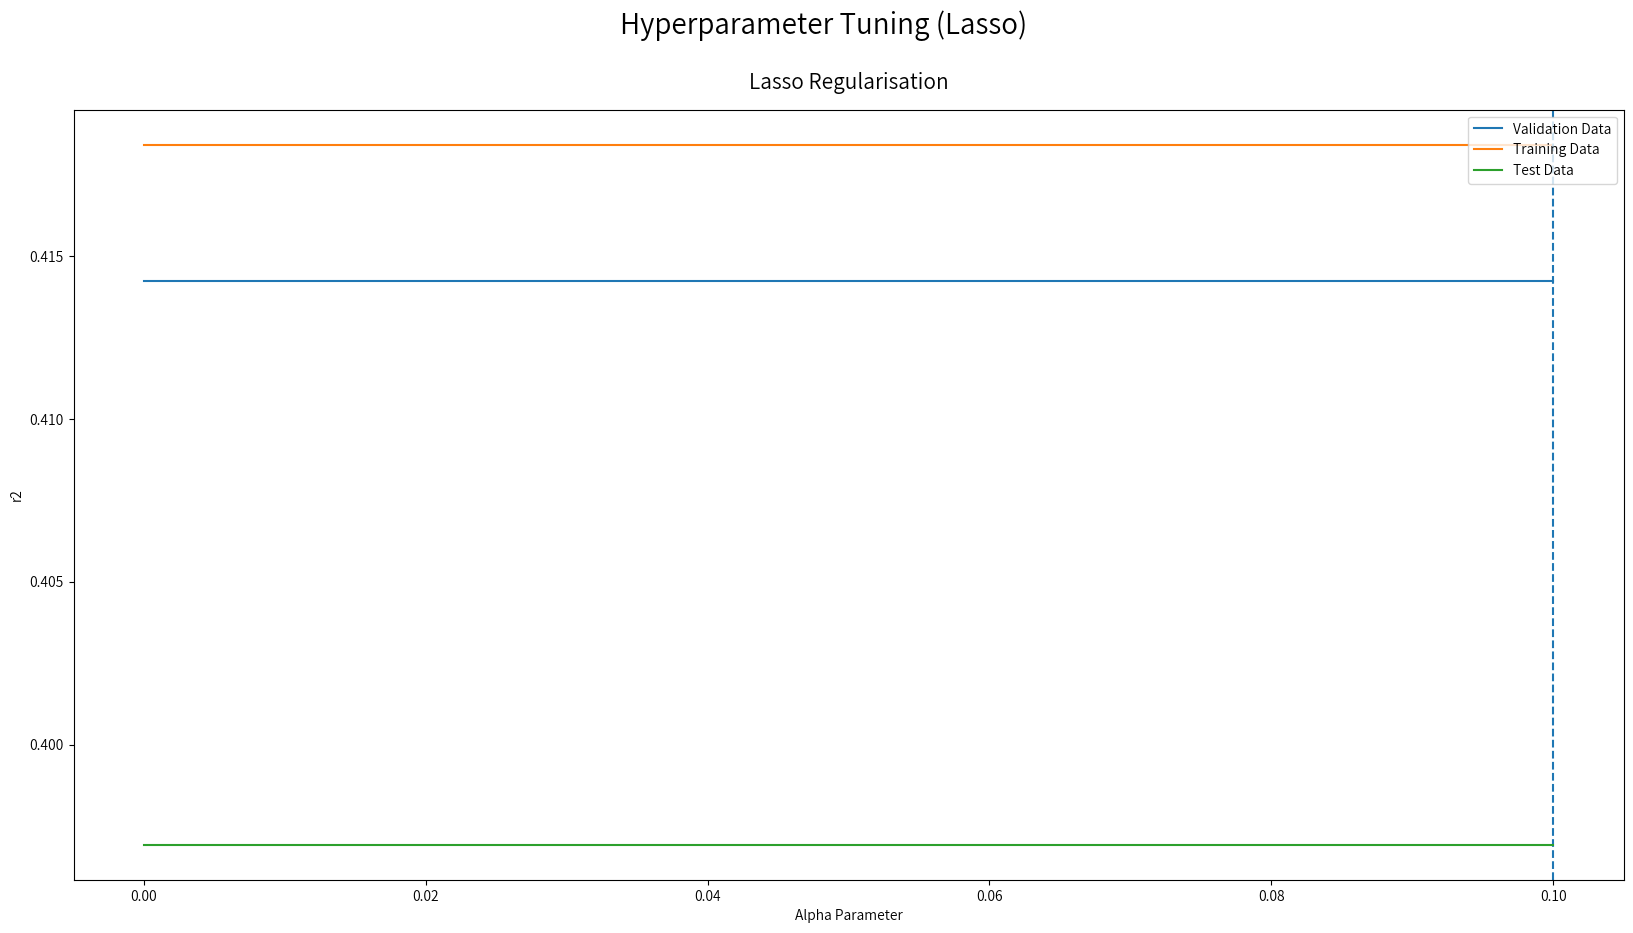

Chosen alpha: 0.10000
Validation score: 0.41422
Test score at chosen alpha: 0.39693


In [44]:
# 选择lasso的最佳a值（r2）
lasso_alphas = np.linspace(0, 0.1, 20)

chosen_alpha, max_validation_score, test_score_at_chosen_alpha, bestmodel = regmodel_param_test(
    lasso_alphas, X_train, y_train, cv, scoring='r2', model_name='Lasso', X_test=X_test, y_test=y_test, draw_plot=True) 
print("Chosen alpha: %.5f" % chosen_alpha)
print("Validation score: %.5f" % max_validation_score)
print("Test score at chosen alpha: %.5f" % test_score_at_chosen_alpha)

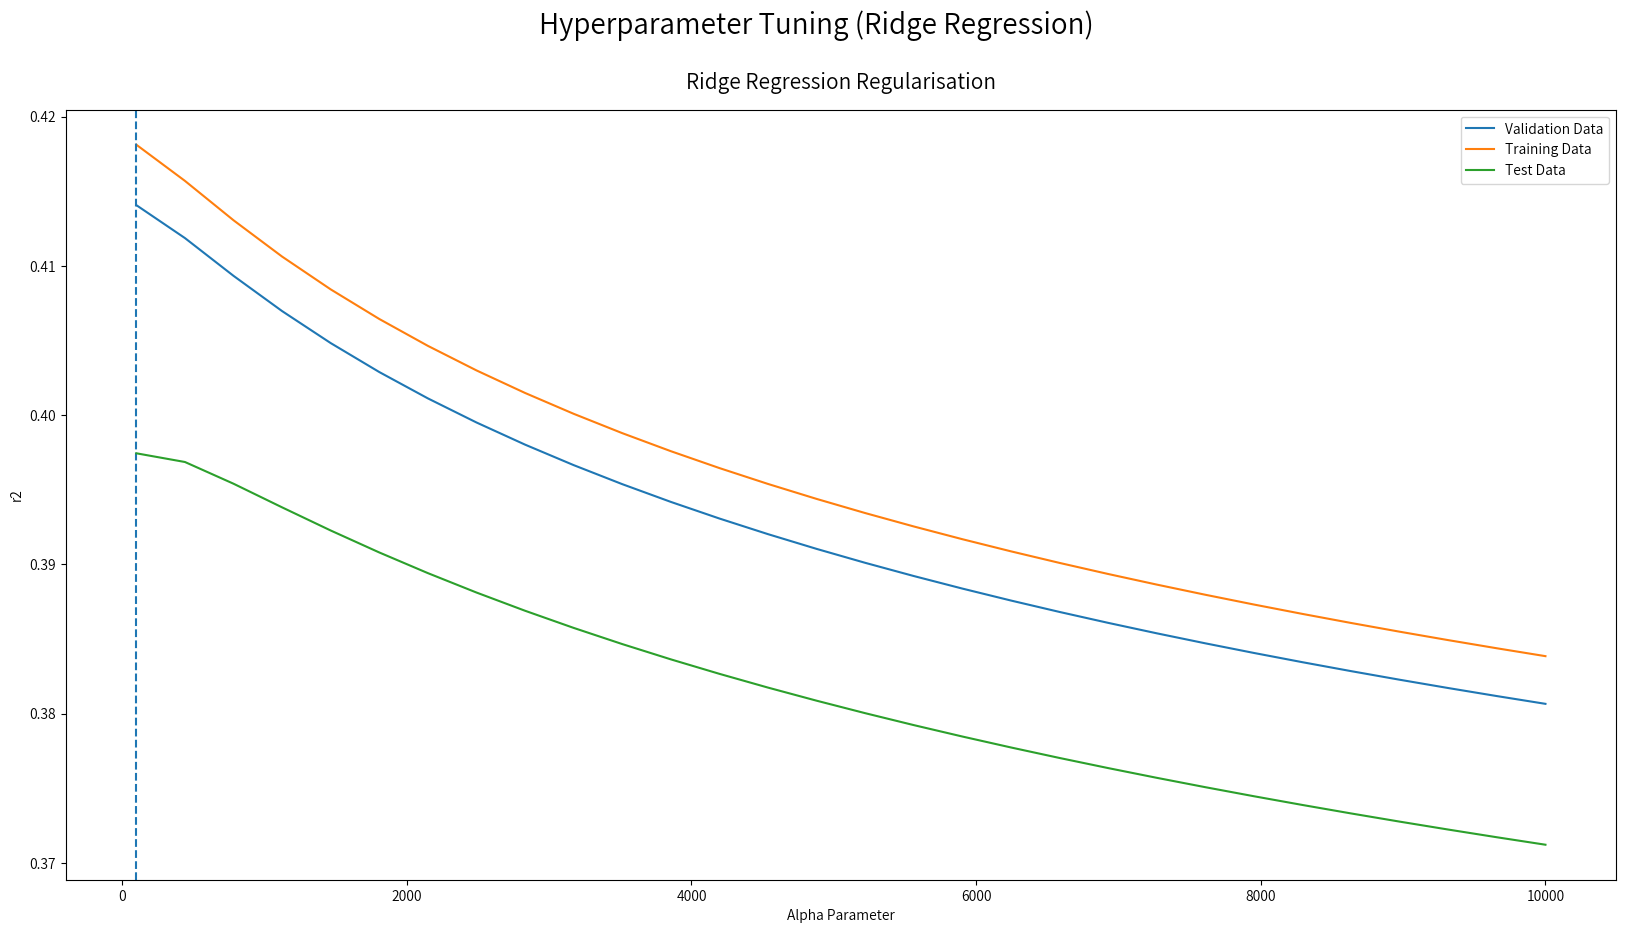

Chosen alpha: 100.00000
Validation score: 0.41406
Test score at chosen alpha: 0.39744


In [45]:
# 岭回归同理
ridge_alphas = np.linspace(100, 10000, 30)

chosen_alpha, max_validation_score, test_score_at_chosen_alpha, bestmodel = regmodel_param_test(
    ridge_alphas, X_train, y_train, cv, scoring='r2', model_name='Ridge Regression', X_test=X_test, y_test=y_test, draw_plot=True) 
print("Chosen alpha: %.5f" % chosen_alpha)
print("Validation score: %.5f" % max_validation_score)
print("Test score at chosen alpha: %.5f" % test_score_at_chosen_alpha)

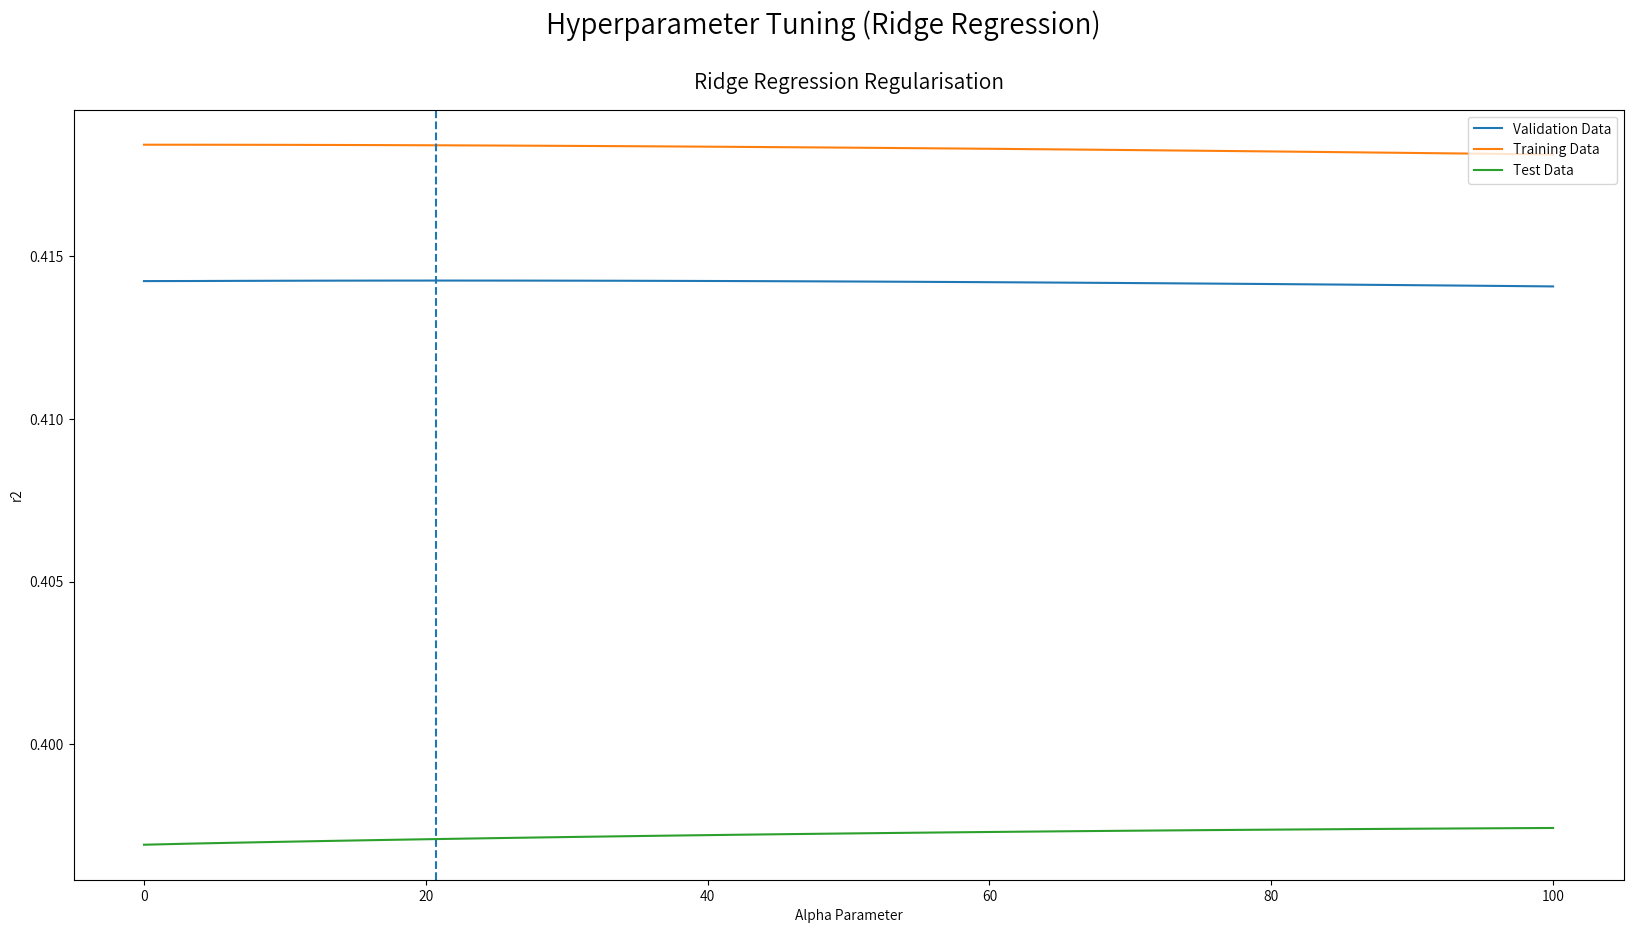

Chosen alpha: 20.68966
Validation score: 0.41424
Test score at chosen alpha: 0.39710


In [46]:
ridge_alphas = np.linspace(0, 100, 30)

chosen_alpha, max_validation_score, test_score_at_chosen_alpha, bestmodel = regmodel_param_test(
    ridge_alphas, X_train, y_train, cv, scoring='r2', model_name='Ridge Regression', X_test=X_test, y_test=y_test, draw_plot=True) 
print("Chosen alpha: %.5f" % chosen_alpha)
print("Validation score: %.5f" % max_validation_score)
print("Test score at chosen alpha: %.5f" % test_score_at_chosen_alpha)

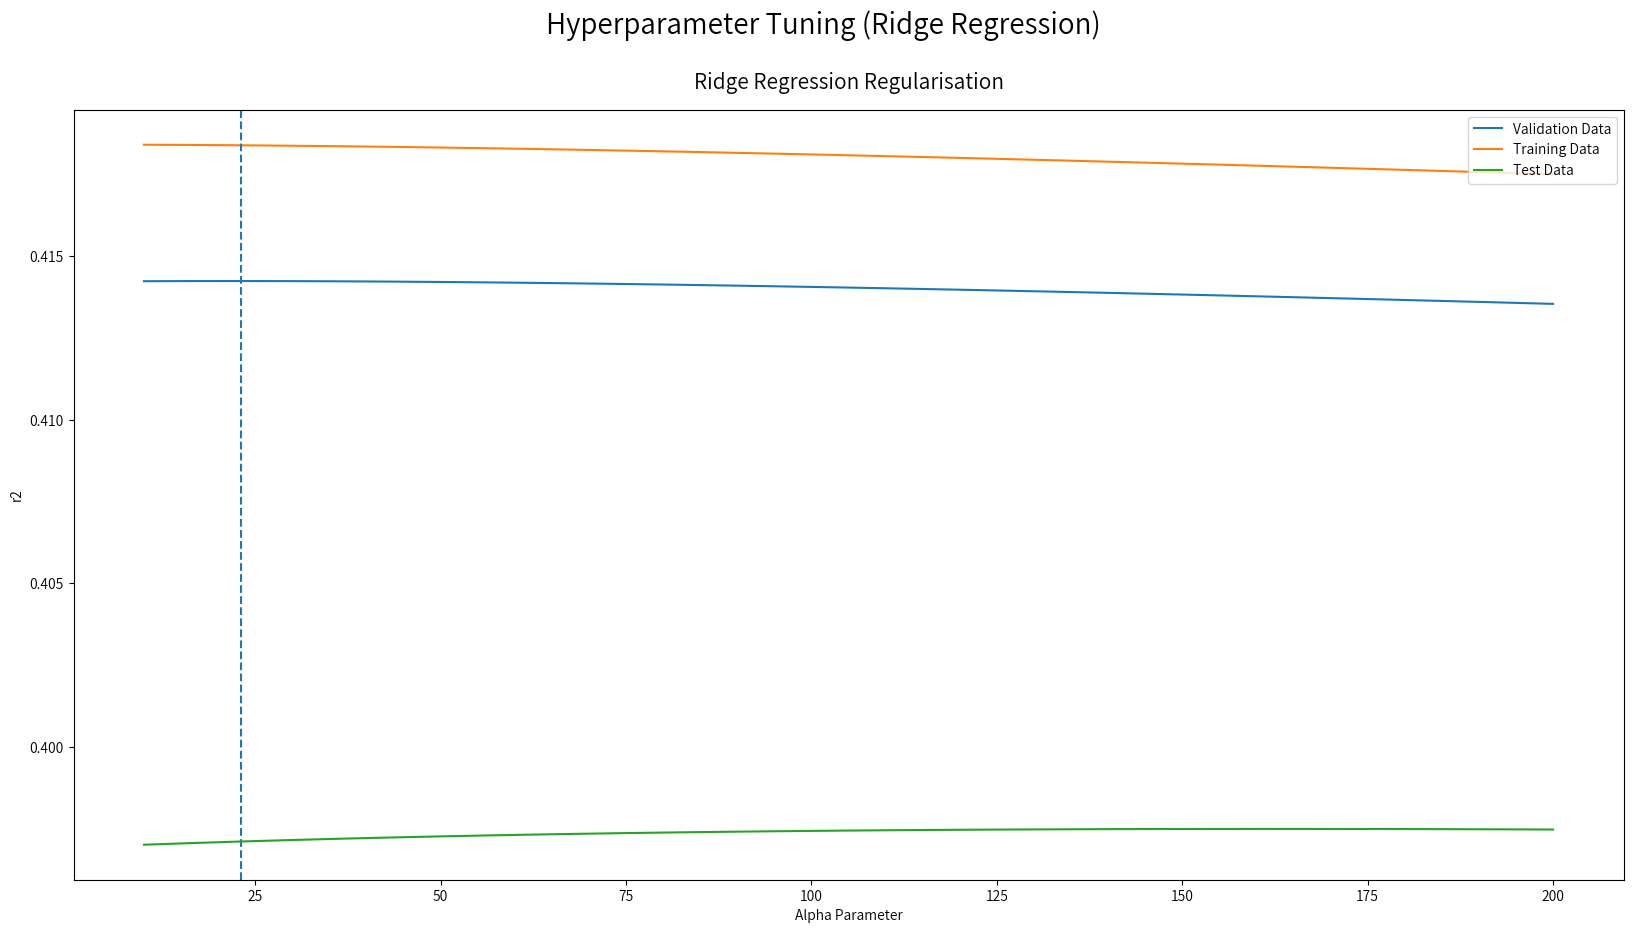

Chosen alpha: 23.10345
Validation score: 0.41424
Test score at chosen alpha: 0.39711


In [47]:
ridge_alphas = np.linspace(10, 200, 30)

chosen_alpha, max_validation_score, test_score_at_chosen_alpha, bestmodel = regmodel_param_test(
    ridge_alphas, X_train, y_train, cv, scoring='r2', model_name='Ridge Regression', X_test=X_test, y_test=y_test, draw_plot=True) 
print("Chosen alpha: %.5f" % chosen_alpha)
print("Validation score: %.5f" % max_validation_score)
print("Test score at chosen alpha: %.5f" % test_score_at_chosen_alpha)

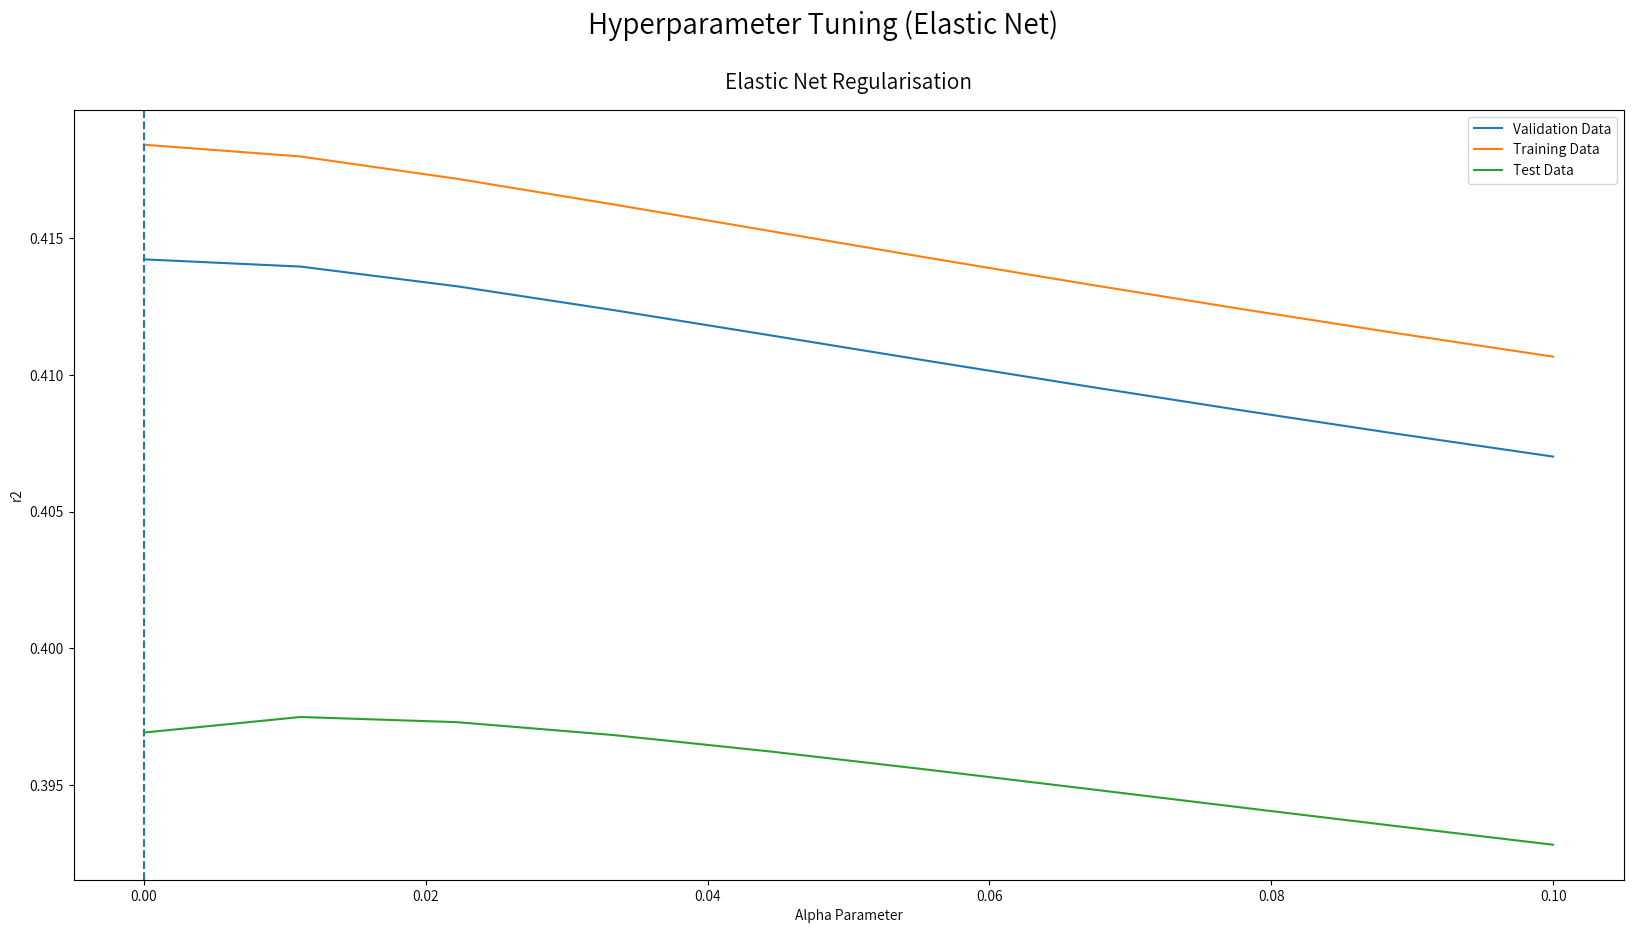

Chosen alpha: 0.00000
Validation score: 0.41422
Test score at chosen alpha: 0.39693


In [48]:
# 弹性网络回归
enet_alphas = np.linspace(0, 0.1, 10)

chosen_alpha, max_validation_score, test_score_at_chosen_alpha, bestmodel = regmodel_param_test(
    enet_alphas, X_train, y_train, cv, scoring='r2', model_name='Elastic Net', X_test=X_test, y_test=y_test, draw_plot=True) 
print("Chosen alpha: %.5f" % chosen_alpha)
print("Validation score: %.5f" % max_validation_score)
print("Test score at chosen alpha: %.5f" % test_score_at_chosen_alpha)

In [49]:
# 调优后
models = [('Linear Regression', LinearRegression()),
          ('Lasso', Lasso(alpha=0.10000)), 
          ('Ridge Regression', Ridge(alpha=20.68966))]

result3 = {'Model':[], 'R2':[], 'Adjusted_R2':[], 'MAE':[], 'MSE':[], 'RMSE':[], 'Alpha':[]}

for name, regressor in models:
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1-(1-r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    result3['Model'].append(name)
    result3['R2'].append(r2)
    result3['Adjusted_R2'].append(adj_r2)
    result3['MAE'].append(mae)
    result3['MSE'].append(mse)
    result3['RMSE'].append(rmse)
    if name == 'Linear Regression':
        result3['Alpha'].append('NaN')
    elif name == 'Lasso':
        result3['Alpha'].append(0.10000)
    elif name == 'Ridge Regression':
        result3['Alpha'].append(20.68966)

result3 = pd.DataFrame(result3)
result3

,Model,R2,Adjusted_R2,MAE,MSE,RMSE,Alpha
0,Linear Regression,0.396926,0.395460,1.386015e+06,4.226579e+12,2.055865e+06,NaN
1,Lasso,0.396926,0.395460,1.386015e+06,4.226579e+12,2.055865e+06,0.1
2,Ridge Regression,0.397095,0.395629,1.385770e+06,4.225393e+12,2.055576e+06,20.68966


In [50]:
results = pd.concat([result1, result2, result3], 
                    keys=['模型', '交互项与非线性因素', '超参数调优'])
results

Model        R2  Adjusted_R2           MAE  \
模型        0  Linear Regression  0.327248     0.326997  1.539372e+06   
          1              Lasso  0.327248     0.326997  1.539372e+06   
          2   Ridge Regression  0.327250     0.326999  1.539364e+06   
          3        Elastic Net  0.291360     0.291096  1.533186e+06   
交互项与非线性因素 0  Linear Regression  0.396926     0.395460  1.386015e+06   
          1              Lasso  0.396926     0.395460  1.386015e+06   
          2   Ridge Regression  0.396935     0.395469  1.386002e+06   
          3        Elastic Net  0.366898     0.365359  1.448129e+06   
超参数调优     0  Linear Regression  0.396926     0.395460  1.386015e+06   
          1              Lasso  0.396926     0.395460  1.386015e+06   
          2   Ridge Regression  0.397095     0.395629  1.385770e+06   

                      MSE          RMSE     Alpha  
模型        0  4.714908e+12  2.171384e+06       NaN  
          1  4.714908e+12  2.171384e+06       1.0  
          2  4.714896e+12  2.171381e+06       1.0  
          3  4.966424e+12  2.228547e+06       1.0  
交互项与非线性因素 0  4.226579e+12  2.055865e+06       NaN  
          1  4.226578e+12  2.055864e+06       1.0  
          2  4.226514e+12  2.055849e+06       1.0  
          3  4.437025e+12  2.106425e+06       1.0  
超参数调优     0  4.226579e+12  2.055865e+06       NaN  
          1  4.226579e+12  2.055865e+06       0.1  
          2  4.225393e+12  2.055576e+06  20.68966

In [51]:
rdg = Ridge(alpha=20.68966)

r2 = np.mean(cross_val_score(rdg, X_interact, y, cv=6, scoring='r2'))
mae = np.mean(-cross_val_score(rdg, X_interact, y, cv=6, scoring='neg_mean_absolute_error'))
mse = np.mean(-cross_val_score(rdg, X_interact, y, cv=6, scoring='neg_mean_squared_error'))
rmse = np.mean(np.sqrt(-cross_val_score(rdg, X_interact, y, cv=6, scoring='neg_mean_squared_error')))

print("Validation score (R2): %.5f" % r2)
print("Validation score (MAE): %.5f" % mae)
print("Validation score (MSE): %.5f" % mse)
print("Validation score (RMSE): %.5f" % rmse)

Validation score (R2): -11.95653
Validation score (MAE): 2716797.37433
Validation score (MSE): 14024886708196.66211
Validation score (RMSE): 3345201.23458
